In [1]:
import pandas as pd

In [3]:
import geopandas as gpd

In [5]:
import os

In [7]:
import matplotlib.pyplot as plt
from osgeo import gdal, osr

In [9]:
import numpy as np

In [11]:
import rasterio

In [ ]:
####### Loading the Mineralization and Deposit zones #######

In [13]:
df_min = gpd.read_file("50K/mineralization_gcs_ngdr_20250224141337303/mineralization_gcs_ngdr.shp", crs="EPSG:32643")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


In [15]:
df_min.to_crs("EPSG:32643", inplace=True)

In [17]:
df_min['commodity'].unique()

array(['GOLD', 'MANGANESE', 'COPPER', 'IRON', 'DIAMOND', 'CORUNDUM',
       'MICA', 'LEAD', 'LIMESTONE', 'MOLYBDENUM', 'TALC', 'PYRITE',
       'GALENA', 'ANTIMONY'], dtype=object)

In [19]:
df_min = df_min[df_min['commodity'].isin(['DIAMOND'])]


In [21]:
df_min = df_min[['commodity','geometry']]

In [23]:
df_min['X'] = df_min.geometry.x
df_min['Y'] = df_min.geometry.y

In [25]:
df_min.head()

commodity                        geometry              X             Y
14   DIAMOND  POINT (777211.527 1692186.703)  777211.526684  1.692187e+06
25   DIAMOND  POINT (777818.553 1691931.282)  777818.552631  1.691931e+06
32   DIAMOND  POINT (782636.963 1606306.328)  782636.962670  1.606306e+06
35   DIAMOND  POINT (778974.667 1692616.682)  778974.666708  1.692617e+06
36   DIAMOND  POINT (779364.362 1689855.918)  779364.362055  1.689856e+06

In [27]:
df_deposit = gpd.read_file("GeospatialMapsPackage/Deposit.shp")

In [29]:
df_deposit.head()

OBJECTID        METALLOGEN          LOCALITY           STATE TOPOSHEET  \
0       221              None          MACHANUR  ANDHRA PRADESH      56 H   
1       474              None            KALLUR       KARNATAKA      56 H   
2       212  HUTTI MASKI BELT       HIRA BUDINI       KARNATAKA      56 D   
3       211  HUTTI MASKI BELT        CHINCHERGI       KARNATAKA      56 D   
4       218  HUTTI MASKI BELT  UTI TEMPLE BLOCK       KARNATAKA      56 D   

  MINERAL_OR                   RESERVE              GRADE  \
0         Cu                   1.91 MT             0.0095   
1         Cu              2.48M.TONNES             0.0085   
2         Au  0.52 M.TONNES(PROBBABLE)  11.96 - 16.16 g/t   
3         Au            0.058 M.TONNES  4.71 - 11 .46 g/t   
4         Au  210,60,80M STRIKE LENGTH       1.0-6.87 g/t   

                                   HOSTROCK                MORPHOGENE  \
0       QUARTZ REEF TRAVERSING PINK GRANITE    DISCODANT-HYDROTHERMAL   
1  QTZ.-CALCITE VEIN IN PORPHYRITIC GRANITE   DISCORDANT-HYDROTHERMAL   
2         CONTACT OF MAFIC FELSIC VOLCANICS  DISCORDANT-SHEAR CONTROL   
3                  BASIC AND ACID VOLCANICS  DISCORDANT-SHEAR CONTROL   
4                 QUARTZ VEIN IN METABASICS   STRATABOUND-REMOBILISED   

             FORMATION                   geometry  
0              GRANITE  POINT (77.70833 16.26389)  
1  PENINSULAR GNEISSES  POINT (77.20694 16.14167)  
2            HUTTI Gp.      POINT (76.8 16.18333)  
3   EASTERN GREENSTONE     POINT (76.78333 16.15)  
4   EASTERN GREENSTONE  POINT (76.76667 16.36667)

In [31]:
df_deposit.to_crs("EPSG:32643", inplace=True)

In [33]:
df_deposit['X'] = df_deposit.geometry.centroid.x
df_deposit['Y'] = df_deposit.geometry.centroid.y

In [35]:
df_deposit_gdf = gpd.GeoDataFrame(df_deposit, geometry=gpd.points_from_xy(df_deposit.X, df_deposit.Y), crs= "EPSG:32643")

In [37]:
df_deposit_gdf.to_crs("EPSG:32643", inplace=True)

In [39]:
df_deposit_gdf['MINERAL_OR'].unique()

array(['Cu', 'Au', 'Au(W)', 'Pb-Zn', 'Di (Diamond)', 'Pb', 'Ba', 'Cu-Pb',
       'Cu-Pb(Ba)', 'Fe(Hematite)', 'Mn', 'Mn-Fe(Hematite)',
       'Cu(Pb,Zn,Sb,Py)', 'Cu (Pb,Zn,Sb ,Py)', 'Au (Cu + Zn)', 'Cr',
       'Fe(Ti-V)', 'Mn (Fe)', 'Fe (Hematite)', 'Cu,Fe(Ti,V)', 'Cu,U',
       'Mn-Fe'], dtype=object)

In [41]:
df_deposit_gdf = df_deposit_gdf[df_deposit_gdf['MINERAL_OR']=='Di (Diamond)']

In [43]:
df_deposit_gdf = df_deposit_gdf[['X','Y','MINERAL_OR','geometry']]

In [ ]:
##### Combining mineralization and deposits ##########

In [45]:
df_min_deposit = gpd.GeoDataFrame(pd.concat([df_min, df_deposit_gdf], ignore_index=True), crs=df_min.crs)


In [47]:
df_min_deposit.head()

commodity                        geometry              X             Y  \
0   DIAMOND  POINT (777211.527 1692186.703)  777211.526684  1.692187e+06   
1   DIAMOND  POINT (777818.553 1691931.282)  777818.552631  1.691931e+06   
2   DIAMOND  POINT (782636.963 1606306.328)  782636.962670  1.606306e+06   
3   DIAMOND  POINT (778974.667 1692616.682)  778974.666708  1.692617e+06   
4   DIAMOND  POINT (779364.362 1689855.918)  779364.362055  1.689856e+06   

  MINERAL_OR  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [49]:
df_min_deposit['commodity'] = df_min_deposit['commodity'].fillna('DIAMOND')

In [51]:
df_min_deposit.drop(['MINERAL_OR'],axis=1, inplace=True)

In [53]:
df_min_deposit['buffer'] = df_min_deposit.geometry.buffer(8000)

In [55]:
df_min_deposit.head()

commodity                        geometry              X             Y  \
0   DIAMOND  POINT (777211.527 1692186.703)  777211.526684  1.692187e+06   
1   DIAMOND  POINT (777818.553 1691931.282)  777818.552631  1.691931e+06   
2   DIAMOND  POINT (782636.963 1606306.328)  782636.962670  1.606306e+06   
3   DIAMOND  POINT (778974.667 1692616.682)  778974.666708  1.692617e+06   
4   DIAMOND  POINT (779364.362 1689855.918)  779364.362055  1.689856e+06   

                                              buffer  
0  POLYGON ((785211.527 1692186.703, 785173.004 1...  
1  POLYGON ((785818.553 1691931.282, 785780.03 16...  
2  POLYGON ((790636.963 1606306.328, 790598.44 16...  
3  POLYGON ((786974.667 1692616.682, 786936.145 1...  
4  POLYGON ((787364.362 1689855.918, 787325.84 16...

In [63]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np


with rasterio.open("final_stacked_kimb_mod.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)]  
    rows, cols = src.shape  

    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)

data = {
    "Longitude": xs,
    "Latitude": ys,
}

for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band

df_mod = pd.DataFrame(data)




In [65]:
df_mod.head()

Longitude      Latitude     Band_1     Band_2    Band_3    Band_4  \
0  695614.73098  1.740257e+06   0.000000   0.000000  0.000000  0.000000   
1  695714.73098  1.740257e+06   0.000000 -39.973640  0.000000  0.007290   
2  695814.73098  1.740257e+06 -76.282608 -37.760284  0.005463  0.006927   
3  695914.73098  1.740257e+06 -76.282608 -34.886192  0.005463  0.016226   
4  696014.73098  1.740257e+06 -76.282608 -32.684429  0.005463  0.018152   

         Band_5        Band_6        Band_7       Band_8        Band_9  \
0  21579.925781  16228.862305  21326.343750  4200.753418  16228.862305   
1  21609.582031  16280.531250  21385.009766  4264.836426  16280.531250   
2  21639.660156  16332.649414  21443.978516  4330.280273  16332.649414   
3  21670.158203  16385.212891  21503.251953  4397.024902  16385.212891   
4  21701.074219  16438.214844  21562.826172  4465.011719  16438.214844   

    Band_10       Band_11       Band_12      Band_13  
0  1.000000  90589.765625  12015.268555  2793.173584  
1  1.000000  90498.773438  12097.406250  2694.725098  
2  0.769231  90407.796875  12179.811523  2596.361328  
3  0.769231  90316.851562  12262.477539  2498.017090  
4  0.769231  90225.914062  12345.401367  2399.791504

In [67]:
df_mod_gdf = gpd.GeoDataFrame(df_mod, geometry=gpd.points_from_xy(df_mod['Longitude'], df_mod['Latitude']), crs="EPSG:32643")

In [69]:
from shapely.geometry import box

minx, miny, maxx, maxy = df_mod_gdf.total_bounds

bbox = box(minx, miny, maxx, maxy)


In [71]:
bbox_gdf = gpd.GeoDataFrame([[1]], geometry=[bbox], crs=df_mod_gdf.crs)


In [73]:
clipped_df_min_deposit = gpd.clip(df_min_deposit, bbox_gdf)

In [75]:
clipped_df_min_deposit.head()

commodity                        geometry              X             Y  \
26   DIAMOND  POINT (769590.967 1658305.896)  769590.967051  1.658306e+06   
16   DIAMOND  POINT (777648.406 1687711.357)  777648.405667  1.687711e+06   
8    DIAMOND  POINT (778324.324 1687788.118)  778324.324468  1.687788e+06   
20   DIAMOND  POINT (771421.913 1687902.337)  771421.913028  1.687902e+06   
9    DIAMOND  POINT (771447.796 1688375.518)  771447.795839  1.688376e+06   

                                               buffer  
26  POLYGON ((777590.967 1658305.896, 777552.445 1...  
16  POLYGON ((785648.406 1687711.357, 785609.883 1...  
8   POLYGON ((786324.324 1687788.118, 786285.802 1...  
20  POLYGON ((779421.913 1687902.337, 779383.391 1...  
9   POLYGON ((779447.796 1688375.518, 779409.274 1...

In [289]:
clipped_df_min_deposit.drop(['buffer'], axis=1, inplace=True)

/var/folders/cj/c3lxhrz916l_n171dhdhbg8h0000gp/T/ipykernel_12673/3764210472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clipped_df_min_deposit.drop(['buffer'], axis=1, inplace=True)


In [291]:
clipped_df_min_deposit.to_file("kimb_deposit.shp")

In [ ]:
#### Finding non-deposit locations using the buffer method ####

In [83]:
df_min_deposit_buffer = gpd.GeoDataFrame(clipped_df_min_deposit[['buffer']], geometry='buffer', crs=clipped_df_min_deposit.crs)


In [85]:
df_min_deposit_buffer.head()

buffer
26  POLYGON ((777590.967 1658305.896, 777552.445 1...
16  POLYGON ((785648.406 1687711.357, 785609.883 1...
8   POLYGON ((786324.324 1687788.118, 786285.802 1...
20  POLYGON ((779421.913 1687902.337, 779383.391 1...
9   POLYGON ((779447.796 1688375.518, 779409.274 1...

In [87]:
joined = gpd.sjoin(df_mod_gdf, df_min_deposit_buffer , predicate='within', how='left')


In [89]:
joined

Longitude      Latitude     Band_1     Band_2    Band_3    Band_4  \
0        695614.73098  1.740257e+06   0.000000   0.000000  0.000000  0.000000   
1        695714.73098  1.740257e+06   0.000000 -39.973640  0.000000  0.007290   
2        695814.73098  1.740257e+06 -76.282608 -37.760284  0.005463  0.006927   
3        695914.73098  1.740257e+06 -76.282608 -34.886192  0.005463  0.016226   
4        696014.73098  1.740257e+06 -76.282608 -32.684429  0.005463  0.018152   
...               ...           ...        ...        ...       ...       ...   
1663187  796714.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663188  796814.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663189  796914.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663190  797014.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663191  797114.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   

               Band_5        Band_6        Band_7       Band_8        Band_9  \
0        21579.925781  16228.862305  21326.343750  4200.753418  16228.862305   
1        21609.582031  16280.531250  21385.009766  4264.836426  16280.531250   
2        21639.660156  16332.649414  21443.978516  4330.280273  16332.649414   
3        21670.158203  16385.212891  21503.251953  4397.024902  16385.212891   
4        21701.074219  16438.214844  21562.826172  4465.011719  16438.214844   
...               ...           ...           ...          ...           ...   
1663187      0.000000      0.000000      0.000000     0.000000      0.000000   
1663188      0.000000      0.000000      0.000000     0.000000      0.000000   
1663189      0.000000      0.000000      0.000000     0.000000      0.000000   
1663190      0.000000      0.000000      0.000000     0.000000      0.000000   
1663191      0.000000      0.000000      0.000000     0.000000      0.000000   

          Band_10       Band_11       Band_12       Band_13  \
0        1.000000  90589.765625  12015.268555   2793.173584   
1        1.000000  90498.773438  12097.406250   2694.725098   
2        0.769231  90407.796875  12179.811523   2596.361328   
3        0.769231  90316.851562  12262.477539   2498.017090   
4        0.769231  90225.914062  12345.401367   2399.791504   
...           ...           ...           ...           ...   
1663187  0.846154  15316.823242  64237.984375  20836.949219   
1663188  0.846154  15413.038086  64327.640625  20855.369141   
1663189  0.846154  15509.301758  64417.328125  20874.251953   
1663190  0.846154  15605.612305  64507.042969  20893.595703   
1663191  0.846154  15700.751953  64596.789062  20913.398438   

                               geometry  index_right  
0        POINT (695614.731 1740257.014)          NaN  
1        POINT (695714.731 1740257.014)          NaN  
2        POINT (695814.731 1740257.014)          NaN  
3        POINT (695914.731 1740257.014)          NaN  
4        POINT (696014.731 1740257.014)          NaN  
...                                 ...          ...  
1663187  POINT (796714.731 1576657.014)          NaN  
1663188  POINT (796814.731 1576657.014)          NaN  
1663189  POINT (796914.731 1576657.014)          NaN  
1663190  POINT (797014.731 1576657.014)          NaN  
1663191  POINT (797114.731 1576657.014)          NaN  

[2164769 rows x 17 columns]

In [91]:
df_non_deposits = joined[joined['index_right'].isna()].drop(columns=['index_right'])


In [93]:
df_mod_gdf.shape

(1663192, 16)

In [95]:
df_non_deposits.shape

(1563610, 16)

In [99]:
df_non_deposits.head()

Longitude      Latitude     Band_1     Band_2    Band_3    Band_4  \
0  695614.73098  1.740257e+06   0.000000   0.000000  0.000000  0.000000   
1  695714.73098  1.740257e+06   0.000000 -39.973640  0.000000  0.007290   
2  695814.73098  1.740257e+06 -76.282608 -37.760284  0.005463  0.006927   
3  695914.73098  1.740257e+06 -76.282608 -34.886192  0.005463  0.016226   
4  696014.73098  1.740257e+06 -76.282608 -32.684429  0.005463  0.018152   

         Band_5        Band_6        Band_7       Band_8        Band_9  \
0  21579.925781  16228.862305  21326.343750  4200.753418  16228.862305   
1  21609.582031  16280.531250  21385.009766  4264.836426  16280.531250   
2  21639.660156  16332.649414  21443.978516  4330.280273  16332.649414   
3  21670.158203  16385.212891  21503.251953  4397.024902  16385.212891   
4  21701.074219  16438.214844  21562.826172  4465.011719  16438.214844   

    Band_10       Band_11       Band_12      Band_13  \
0  1.000000  90589.765625  12015.268555  2793.173584   
1  1.000000  90498.773438  12097.406250  2694.725098   
2  0.769231  90407.796875  12179.811523  2596.361328   
3  0.769231  90316.851562  12262.477539  2498.017090   
4  0.769231  90225.914062  12345.401367  2399.791504   

                         geometry  
0  POINT (695614.731 1740257.014)  
1  POINT (695714.731 1740257.014)  
2  POINT (695814.731 1740257.014)  
3  POINT (695914.731 1740257.014)  
4  POINT (696014.731 1740257.014)

In [101]:
df_non_deposits = df_non_deposits.sample(n=100, axis=0, ignore_index=False)


In [103]:
df_non_deposits.to_csv("non_deposits_kimb_buffer.csv")

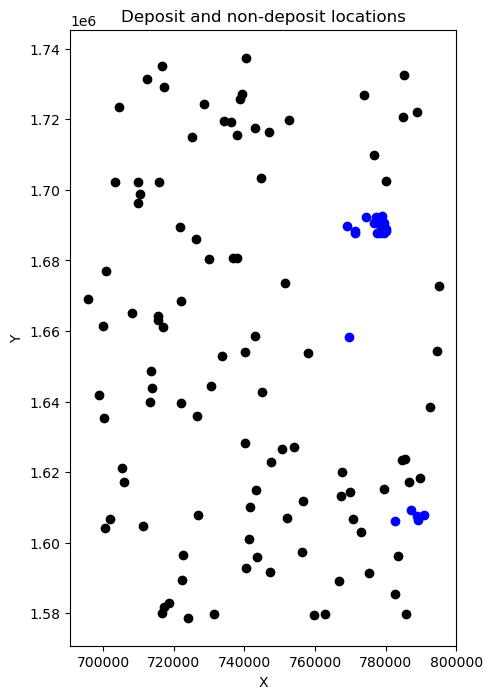

In [107]:
fig, ax = plt.subplots(figsize=(8,8))
clipped_df_min_deposit.plot(ax=ax, color = 'blue', label='Mineralization zones')
df_non_deposits.plot(ax=ax, color='black', label='Non_deposit_zones')
#plt.xlimit()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Deposit and non-deposit locations")
plt.show()

In [ ]:
######## Making combined NGCM data ###### 

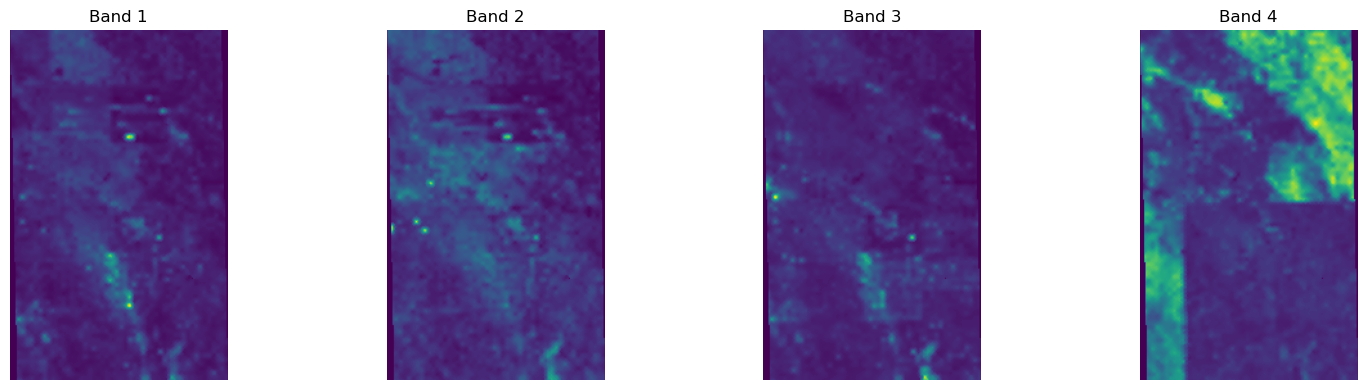

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the merged raster
with rasterio.open("final_NGCM_layers.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  # Convert to float for NaN support
        #if nodata is None:
        #    band = np.where(band == nodata, np.nan, band)
        #if src.nodata is not None:
        #    band[band == src.nodata] = np.nan
        bands.append(band)

# Plot all bands in a grid
cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

# Hide unused subplots if total bands < rows * cols
for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [9]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np

# Open the merged TIFF file
with rasterio.open("final_NGCM_layers.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)]  # Flatten all bands
    rows, cols = src.shape  # Get raster dimensions

    # Get coordinates for all pixels
    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)

# Create a dictionary for DataFrame construction
data = {
    "X": xs,
    "Y": ys,
}

# Add each band to the dictionary with column name Band_i
for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band

# Convert to DataFrame
df_NGCM = pd.DataFrame(data)

In [11]:
df_NGCM

X             Y     Band_1     Band_2      Band_3  \
0        695614.73098  1.740257e+06   0.000000   0.000000    0.000000   
1        695714.73098  1.740257e+06   0.000000   0.000000    0.000000   
2        695814.73098  1.740257e+06  43.480644  25.700001  111.325806   
3        695914.73098  1.740257e+06  43.480644  25.700001  111.325806   
4        696014.73098  1.740257e+06  43.480644  25.700001  111.325806   
...               ...           ...        ...        ...         ...   
1663187  796714.73098  1.576657e+06  32.521053  14.326316  108.184212   
1663188  796814.73098  1.576657e+06  32.521053  14.326316  108.184212   
1663189  796914.73098  1.576657e+06  32.521053  14.326316  108.184212   
1663190  797014.73098  1.576657e+06  32.521053  14.326316  108.184212   
1663191  797114.73098  1.576657e+06   0.000000   0.000000    0.000000   

           Band_4  
0        0.000000  
1        0.000000  
2        0.682581  
3        0.682581  
4        0.682581  
...           ...  
1663187  0.755789  
1663188  0.755789  
1663189  0.755789  
1663190  0.755789  
1663191  0.000000  

[1663192 rows x 6 columns]

In [19]:
import geopandas as gpd
df_NGCM_gpd = gpd.GeoDataFrame(df_NGCM, geometry = gpd.points_from_xy(df_NGCM['X'], df_NGCM['Y']), crs = "EPSG:32643")
                                                                  

<Axes: >

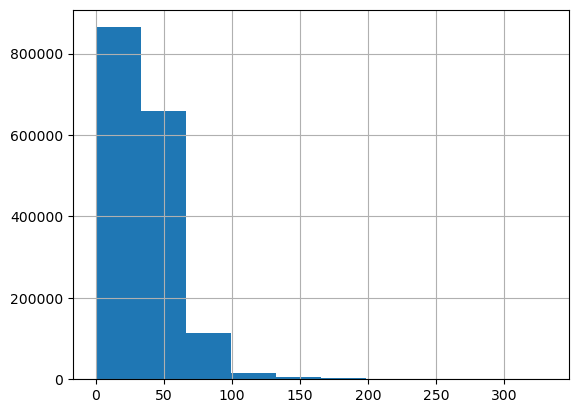

In [21]:
df_NGCM['Band_1'].hist()

In [27]:
import pandas as pd

df_NGCM_gpd['Band1_class'] = 0


df_NGCM_gpd.loc[(df_NGCM_gpd['Band_1'] >= 0) & (df_NGCM_gpd['Band_1'] < 50), 'Band1_class'] = 1
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_1'] >= 50) & (df_NGCM_gpd['Band_1'] < 100), 'Band1_class'] = 2
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_1'] >= 100) & (df_NGCM_gpd['Band_1'] < 150), 'Band1_class'] = 3
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_1'] >= 150) & (df_NGCM_gpd['Band_1'] < 200), 'Band1_class'] = 4
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_1'] >= 200) & (df_NGCM_gpd['Band_1'] < 250), 'Band1_class'] = 5
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_1'] >= 250), 'Band1_class'] = 6


<Axes: >

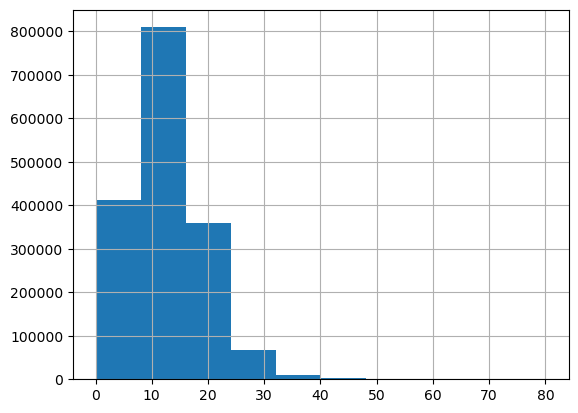

In [29]:
df_NGCM_gpd['Band_2'].hist()

In [31]:
import pandas as pd

df_NGCM_gpd['Band2_class'] = 0


df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 0) & (df_NGCM_gpd['Band_2'] < 10), 'Band2_class'] = 1
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 10) & (df_NGCM_gpd['Band_2'] < 20), 'Band2_class'] = 2
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 20) & (df_NGCM_gpd['Band_2'] < 30), 'Band2_class'] = 3
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 30) & (df_NGCM_gpd['Band_2'] < 40), 'Band2_class'] = 4
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 40) & (df_NGCM_gpd['Band_2'] < 50), 'Band2_class'] = 5
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 50) & (df_NGCM_gpd['Band_2'] < 60), 'Band2_class'] = 6
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 60) & (df_NGCM_gpd['Band_2'] < 70), 'Band2_class'] = 7
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 70) & (df_NGCM_gpd['Band_2'] < 80), 'Band2_class'] = 8
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_2'] >= 80), 'Band2_class'] = 9


<Axes: >

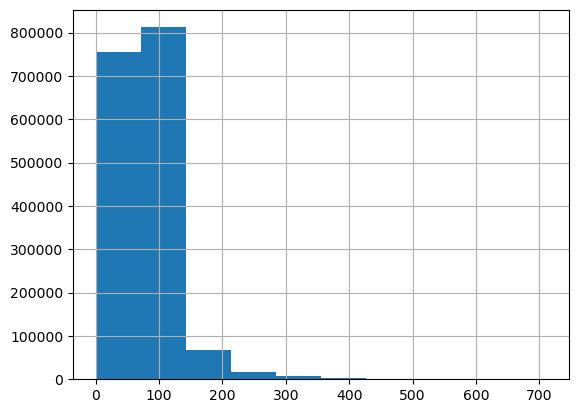

In [33]:
df_NGCM_gpd['Band_3'].hist()

In [35]:
import pandas as pd

df_NGCM_gpd['Band3_class'] = 0


df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 0) & (df_NGCM_gpd['Band_3'] < 100), 'Band3_class'] = 1
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 100) & (df_NGCM_gpd['Band_3'] < 200), 'Band3_class'] = 2
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 200) & (df_NGCM_gpd['Band_3'] < 300), 'Band3_class'] = 3
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 300) & (df_NGCM_gpd['Band_3'] < 400), 'Band3_class'] = 4
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 400) & (df_NGCM_gpd['Band_3'] < 500), 'Band3_class'] = 5
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 500) & (df_NGCM_gpd['Band_3'] < 600), 'Band3_class'] = 6
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 600) & (df_NGCM_gpd['Band_3'] < 700), 'Band3_class'] = 7
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_3'] >= 700), 'Band3_class'] = 8

<Axes: >

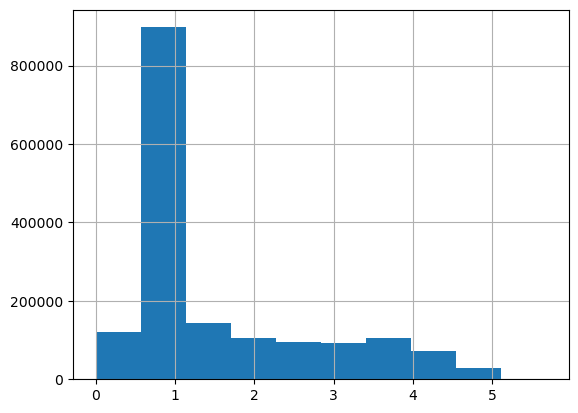

In [37]:
df_NGCM_gpd['Band_4'].hist()

In [39]:
import pandas as pd

df_NGCM_gpd['Band4_class'] = 0


df_NGCM_gpd.loc[(df_NGCM_gpd['Band_4'] >= 0) & (df_NGCM_gpd['Band_4'] < 1), 'Band4_class'] = 1
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_4'] >= 1) & (df_NGCM_gpd['Band_4'] < 2), 'Band4_class'] = 2
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_4'] >= 2) & (df_NGCM_gpd['Band_4'] < 3), 'Band4_class'] = 3
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_4'] >= 3) & (df_NGCM_gpd['Band_4'] < 4), 'Band4_class'] = 4
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_4'] >= 4) & (df_NGCM_gpd['Band_4'] < 5), 'Band4_class'] = 5
df_NGCM_gpd.loc[(df_NGCM_gpd['Band_4'] >= 5) , 'Band4_class'] = 6

In [41]:
df_NGCM_gpd['combined_class'] = df_NGCM_gpd['Band1_class']+df_NGCM_gpd['Band2_class']+df_NGCM_gpd['Band3_class']+df_NGCM_gpd['Band4_class']

In [43]:
df_NGCM_gpd['combined_class'] = 1 - (df_NGCM_gpd['combined_class'] - np.min(df_NGCM_gpd['combined_class'])) / (np.max(df_NGCM_gpd['combined_class']) - np.min(df_NGCM_gpd['combined_class']))


In [47]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin

gdf = df_NGCM_gpd
value_column = 'combined_class'

pixel_size = 100  
minx, miny, maxx, maxy = df_NGCM_gpd.total_bounds  
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)
transform = from_origin(minx, maxy, pixel_size, pixel_size)  
out_shape = (height, width)


shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf[value_column]))


raster = rasterize(shapes=shapes, out_shape=out_shape, transform=transform)

with rasterio.open(
    'combined_class_ngcm_kimb.tif',
    'w',
    driver='GTiff',
    height=out_shape[0],
    width=out_shape[1],
    count=1,
    dtype=raster.dtype,
    crs=gdf.crs,
    transform=transform
) as dst:
    dst.write(raster, 1)


CRS: EPSG:32643
Bounds: BoundingBox(left=695614.73098, bottom=1576657.0136, right=797114.73098, top=1740257.0136)


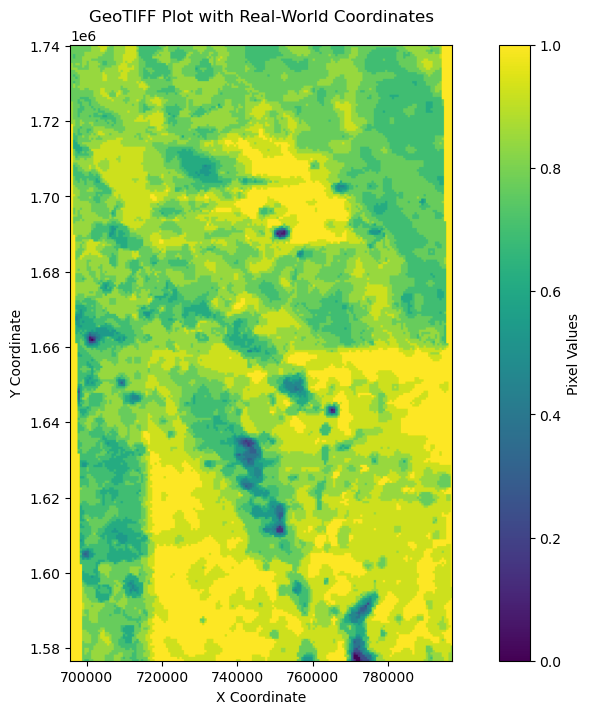

In [49]:
import numpy as np
with rasterio.open('combined_class_ngcm_kimb.tif') as src:
    raster_data = src.read(1)  
    nodata = src.nodata
    bounds = src.bounds  
    if nodata is not None:
        raster_data = np.where(raster_data == nodata, np.nan, raster_data)
    crs = src.crs         
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")

    
    plt.figure(figsize=(12, 8))
    plt.imshow(
        raster_data,
        cmap='viridis',
        extent=[bounds.left, bounds.right, bounds.bottom, bounds.top]
    )
    plt.colorbar(label='Pixel Values')
    plt.title('GeoTIFF Plot with Real-World Coordinates')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [47]:
df_NGCM_ratios = pd.read_csv("NGCM_ratios.csv")

In [49]:
df_NGCM_ratios

ratio_k20_AL2O3  ratio_k20_Na2O       UTMX_43N      UTMY_43N          X  \
0            0.133779        2.000000  735298.986622  1.725803e+06  77.194444   
1            0.064381        1.974359  737285.531163  1.725823e+06  77.212963   
2            0.123870        1.929577  739271.989794  1.725844e+06  77.231481   
3            0.093236        2.081633  741258.577238  1.725865e+06  77.250000   
4            0.101777        2.520000  715416.390879  1.727601e+06  77.009259   
...               ...             ...            ...           ...        ...   
9990         0.093508        1.847059  708019.661440  1.547908e+06  76.925900   
9991         0.098976        1.198347  710018.556109  1.547925e+06  76.944400   
9992         0.140205        1.887931  712017.470255  1.547941e+06  76.962900   
9993         0.140127        1.067961  714016.404064  1.547958e+06  76.981400   
9994         0.097708        1.012500  716015.357721  1.547975e+06  76.999900   

              Y  
0     15.599099  
1     15.599099  
2     15.599099  
3     15.599099  
4     15.617117  
...         ...  
9990  13.994000  
9991  13.994000  
9992  13.994000  
9993  13.994000  
9994  13.994000  

[9995 rows x 6 columns]

In [51]:
df_NGCM_ratios_gdf = gpd.GeoDataFrame(df_NGCM_ratios, geometry = gpd.points_from_xy(df_NGCM_ratios.X, df_NGCM_ratios.Y), crs="EPSG:32643")

In [83]:
df_NGCM_ratios_gdf.to_crs(crs = "EPSG:32643", inplace=True)

In [87]:
df_NGCM_ratios_gdf.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [93]:
from sklearn.preprocessing import MinMaxScaler

ratio_values = df_NGCM_ratios_gdf['ratio_k20_Na2O'].values
ratio_values = ratio_values.reshape(-1,1)
scaler = MinMaxScaler()
ratio_values_scaled= scaler.fit_transform(ratio_values)

In [103]:
ratio_values_scaled

array([[0.02762983],
       [0.02726849],
       [0.02663741],
       ...,
       [0.02605052],
       [0.01449524],
       [0.01371366]])

(array([9.949e+03, 4.000e+01, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

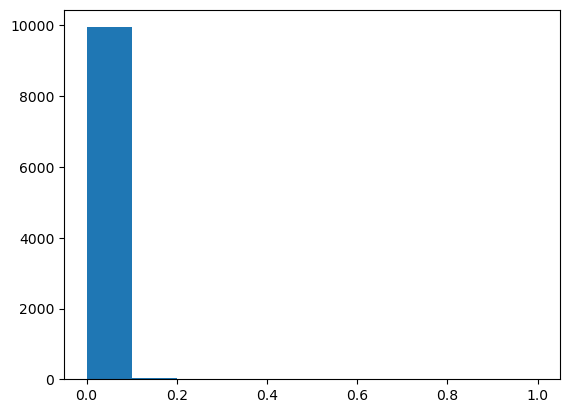

In [109]:
import matplotlib.pyplot as plt
plt.hist(ratio_values_scaled)

In [125]:
import numpy as np

data = np.array(df_NGCM_ratios_gdf['ratio_k20_Na2O'])

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_NGCM_ratios_gdf[
    (df_NGCM_ratios_gdf['ratio_k20_Na2O'] >= lower_bound) &
    (df_NGCM_ratios_gdf['ratio_k20_Na2O'] <= upper_bound)
]


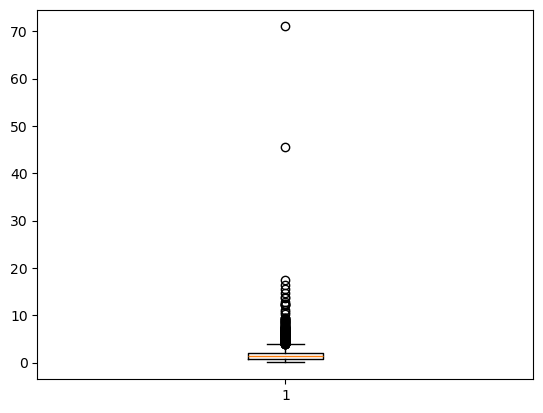

In [115]:
plt.boxplot(df_NGCM_ratios_gdf['ratio_k20_Na2O'])
plt.show()


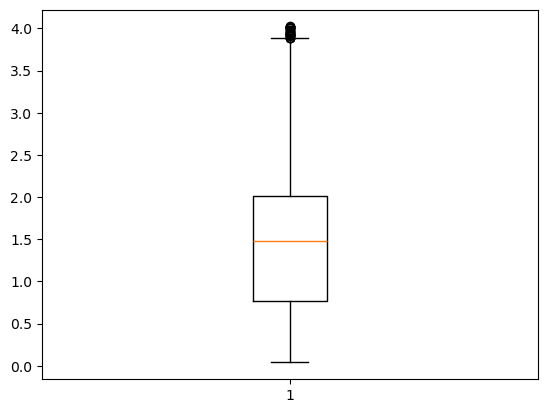

In [119]:
plt.boxplot(filtered_data)
plt.show()


(array([1743.,  816., 1218., 1833., 1701., 1096.,  638.,  346.,  172.,
         116.]),
 array([0.03937008, 0.4377058 , 0.83604152, 1.23437724, 1.63271296,
        2.03104868, 2.4293844 , 2.82772011, 3.22605583, 3.62439155,
        4.02272727]),
 <BarContainer object of 10 artists>)

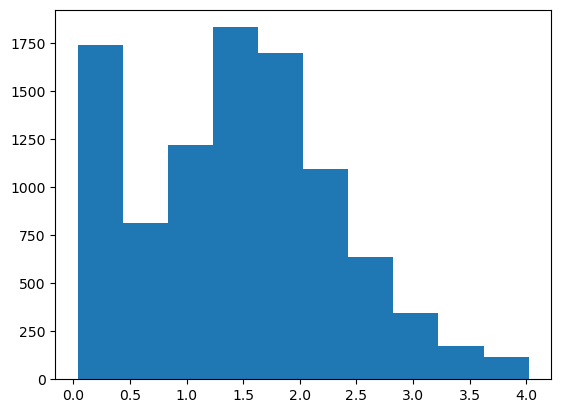

In [121]:
plt.hist(filtered_data)

In [131]:
df_filtered[df_filtered['ratio_k20_Na2O'] > 3.0].shape

(453, 8)

<Axes: >

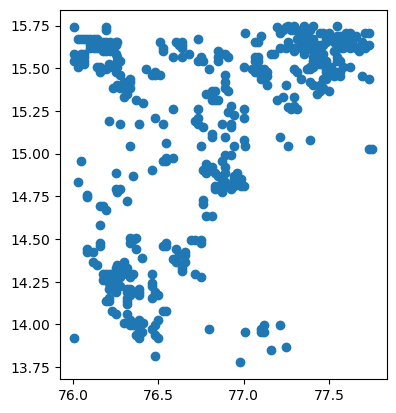

In [127]:
df_filtered[df_filtered['ratio_k20_Na2O'] > 3.0].plot()

In [133]:
df_ratio_filtered = df_filtered[df_filtered['ratio_k20_Na2O']>3.0]

In [137]:
df_ratio_filtered = df_ratio_filtered[['ratio_k20_Na2O','UTMX_43N','UTMY_43N']]

In [139]:
df_ratio_filtered_gpd = gpd.GeoDataFrame(df_ratio_filtered, geometry=gpd.points_from_xy(df_ratio_filtered.UTMX_43N, df_ratio_filtered.UTMY_43N), crs="EPSG:32643")

In [141]:
df_ratio_filtered_gpd

ratio_k20_Na2O       UTMX_43N      UTMY_43N  \
15          3.792453  737264.796554  1.727818e+06   
17          3.655172  741237.494789  1.727859e+06   
35          3.761905  721336.090663  1.731646e+06   
36          3.687500  723321.861335  1.731666e+06   
79          3.258065  721452.087102  1.719682e+06   
...              ...            ...           ...   
9789        3.270833  643999.393895  1.547468e+06   
9790        3.822222  645997.762816  1.547479e+06   
9797        4.000000  659997.537210  1.547563e+06   
9825        3.321839  714194.037749  1.523957e+06   
9969        3.058333  694032.218899  1.545807e+06   

                            geometry  
15    POINT (737264.797 1727817.694)  
17    POINT (741237.495 1727859.368)  
35    POINT (721336.091 1731646.125)  
36    POINT (723321.861 1731665.528)  
79    POINT (721452.087 1719681.571)  
...                              ...  
9789  POINT (643999.394 1547467.952)  
9790  POINT (645997.763 1547479.278)  
9797  POINT (659997.537 1547562.998)  
9825  POINT (714194.038 1523957.067)  
9969  POINT (694032.219 1545806.795)  

[453 rows x 4 columns]

In [145]:
df_ratio_filtered_gpd.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

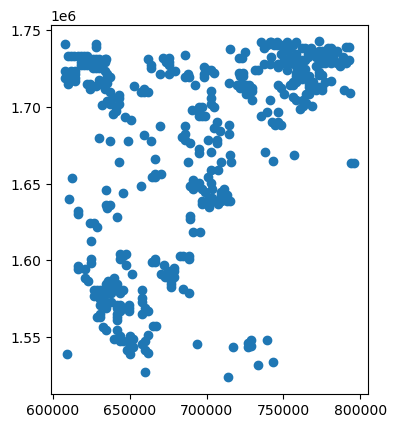

In [147]:
df_ratio_filtered_gpd.plot()

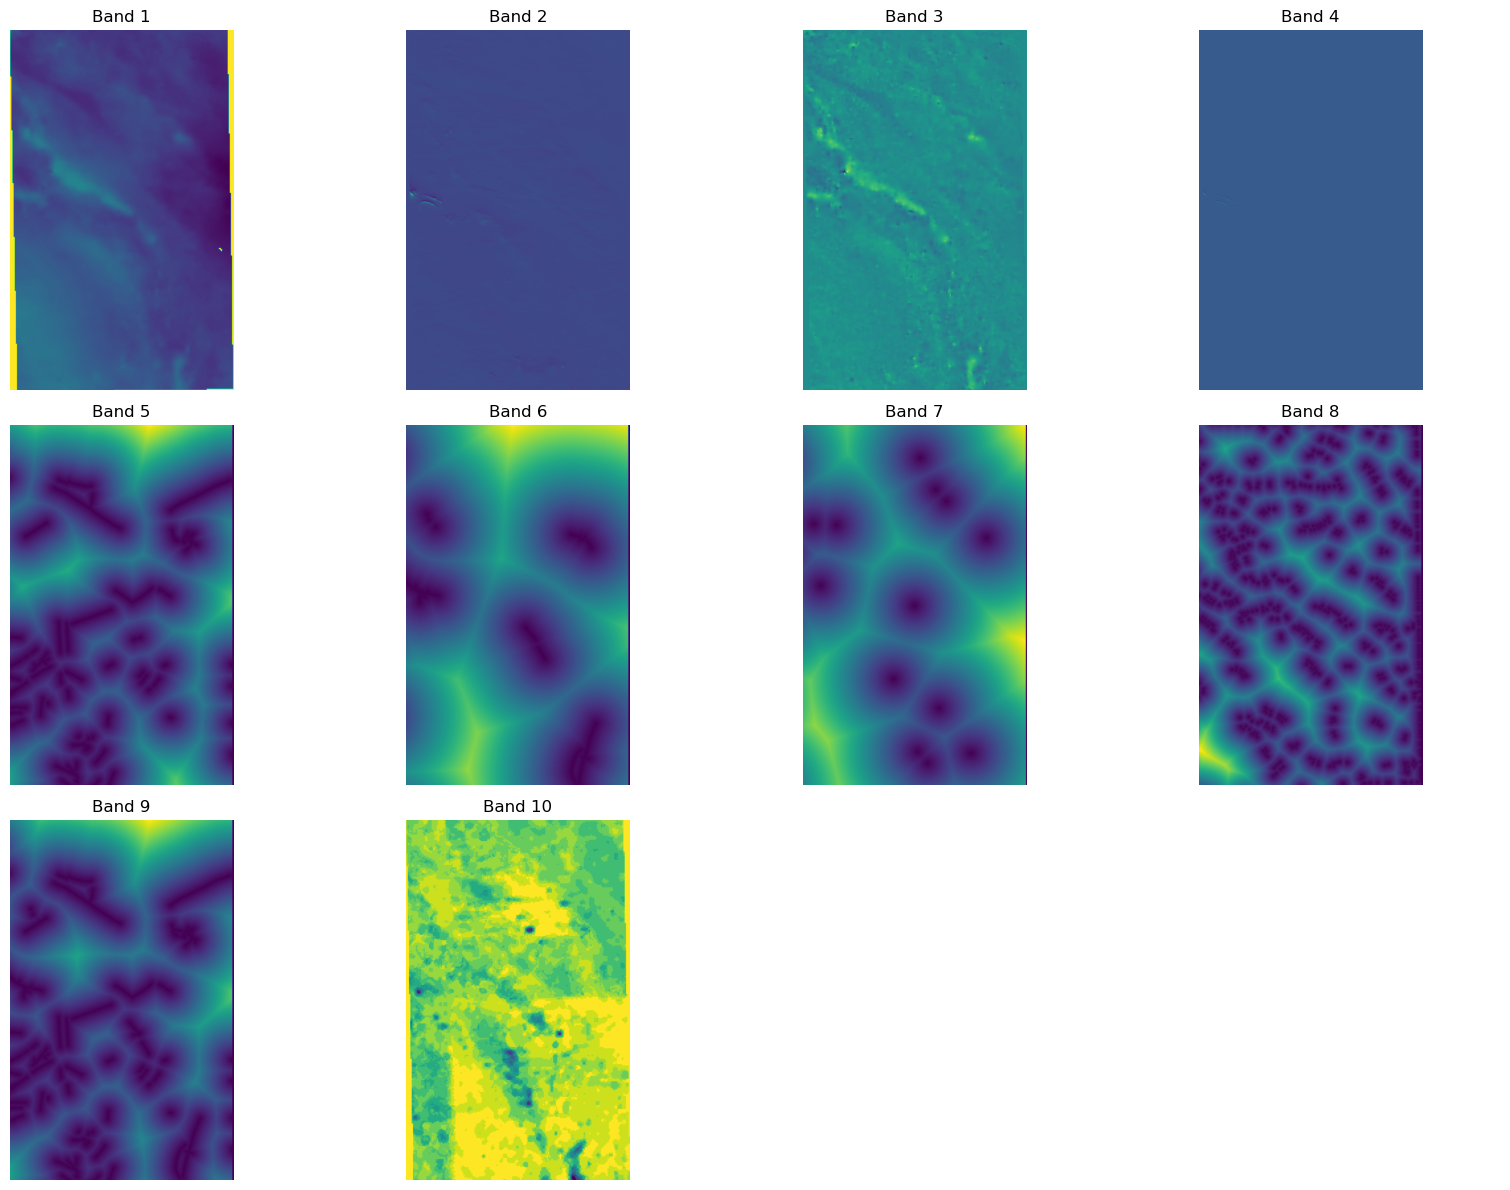

In [53]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("final_stacked_kimb.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  
        #if nodata is None:
        #    band = np.where(band == nodata, np.nan, band)
        #if src.nodata is not None:
        #    band[band == src.nodata] = np.nan
        bands.append(band)

cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

# Hide unused subplots if total bands < rows * cols
for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [55]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np

with rasterio.open("final_stacked_kimb.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)]  
    rows, cols = src.shape  

   
    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)


data = {
    "X": xs,
    "Y": ys,
}


for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band


df_kimb = pd.DataFrame(data)

In [57]:
df_kimb_gpd = gpd.GeoDataFrame(df_kimb, geometry = gpd.points_from_xy(df_kimb.X, df_kimb.Y))

In [ ]:
##### Proximity to Mesoproterozoic age ####

In [57]:
df_lith = gpd.read_file("50K/lithology_gcs_ngdr_20250224141337303/lithology_gcs_ngdr.shp", crs="EPSG:32643")

In [69]:
df_lith.to_crs("EPSG:32643", inplace=True)

In [77]:
df_lith['age'].unique()

array(['ARCHAEAN', 'ARCHAEAN- PALAEOPROTEROZOIC', 'PALAEOPROTEROZOIC',
       'PLEISTOCENE', 'CENOZOIC', 'MESOPROTEROZOIC', 'NEOPROTEROZOIC'],
      dtype=object)

In [83]:
df_meso = df_lith[df_lith['age']=="MESOPROTEROZOIC"]

In [89]:
df_meso.columns

Index(['gid', 'objectid', 'input_cent', 'toposheet_', 'edition_nu',
       'geometry_i', 'age', 'supergroup', 'group_name', 'formation', 'member',
       'lithologic', 'sub_group', 'new_geom_i', 'uid_notati', 'intrusive',
       'script', 'notation', 'stratigrap', 'area', 'area1', 'notation12',
       'shape_leng', 'shape_area', 'stratigr_1', 'sld_name', 'notation_l',
       'geometry'],
      dtype='object')

In [97]:
df_meso = df_meso[['age','geometry']]

In [109]:
from shapely.geometry import shape

points = [shape(geom) for geom in df_kimb_gpd['geometry'] if geom is not None]
points1 = [shape(geom) for geom in df_meso['geometry'] if geom is not None]

In [111]:
from shapely.strtree import STRtree
import numpy as np

points = df_kimb_gpd['geometry'].dropna().tolist()

tree_points = STRtree(points1)


def min_distance(point, tree, geometries):
    nearest_idx = tree.nearest(point)
    nearest_geom = geometries[nearest_idx]
    return point.distance(nearest_geom)


df_kimb_gpd['min_dist_to_meso'] = [min_distance(point, tree_points, points1) for point in points]

<Axes: >

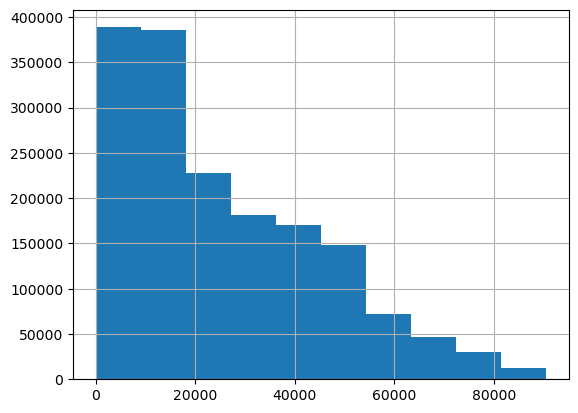

In [113]:
df_kimb_gpd['min_dist_to_meso'].hist()

In [117]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin

gdf = df_kimb_gpd
value_column = 'min_dist_to_meso'

pixel_size = 100  
minx, miny, maxx, maxy = df_kimb_gpd.total_bounds  
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)
transform = from_origin(minx, maxy, pixel_size, pixel_size)  
out_shape = (height, width)


shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf[value_column]))

raster = rasterize(shapes=shapes, out_shape=out_shape, transform=transform)

with rasterio.open(
    'dist_to_meso.tif',
    'w',
    driver='GTiff',
    height=out_shape[0],
    width=out_shape[1],
    count=1,
    dtype=raster.dtype,
    crs=gdf.crs,
    transform=transform
) as dst:
    dst.write(raster, 1)


In [155]:
df_ratio_filtered_gpd.columns

Index(['ratio_k20_Na2O', 'UTMX_43N', 'UTMY_43N', 'geometry'], dtype='object')

In [157]:
from shapely.geometry import shape

points = [shape(geom) for geom in df_kimb_gpd['geometry'] if geom is not None]
points1 = [shape(geom) for geom in df_ratio_filtered_gpd['geometry'] if geom is not None]

In [159]:
from shapely.strtree import STRtree
import numpy as np

points = df_kimb_gpd['geometry'].dropna().tolist()

tree_points = STRtree(points1)


def min_distance(point, tree, geometries):
    nearest_idx = tree.nearest(point)
    nearest_geom = geometries[nearest_idx]
    return point.distance(nearest_geom)


df_kimb_gpd['min_dist_to_K2O_Na2O'] = [min_distance(point, tree_points, points1) for point in points]

<Axes: >

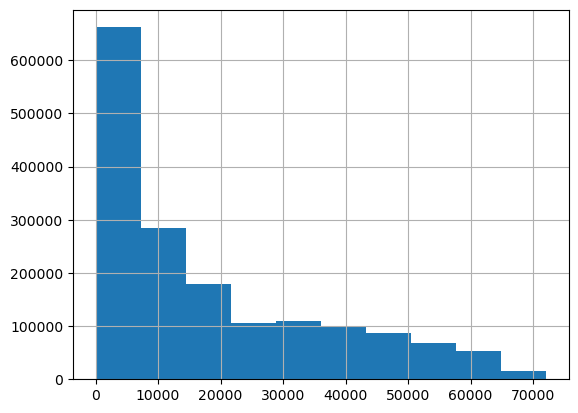

In [161]:
df_kimb_gpd['min_dist_to_K2O_Na2O'].hist()

In [163]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin

gdf = df_kimb_gpd
value_column = 'min_dist_to_K2O_Na2O'


pixel_size = 100  
minx, miny, maxx, maxy = df_kimb_gpd.total_bounds 
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)
transform = from_origin(minx, maxy, pixel_size, pixel_size)
out_shape = (height, width)


shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf[value_column]))


raster = rasterize(shapes=shapes, out_shape=out_shape, transform=transform)

with rasterio.open(
    'dist_to_ratio_K2O_Na2O.tif',
    'w',
    driver='GTiff',
    height=out_shape[0],
    width=out_shape[1],
    count=1,
    dtype=raster.dtype,
    crs=gdf.crs,
    transform=transform
) as dst:
    dst.write(raster, 1)

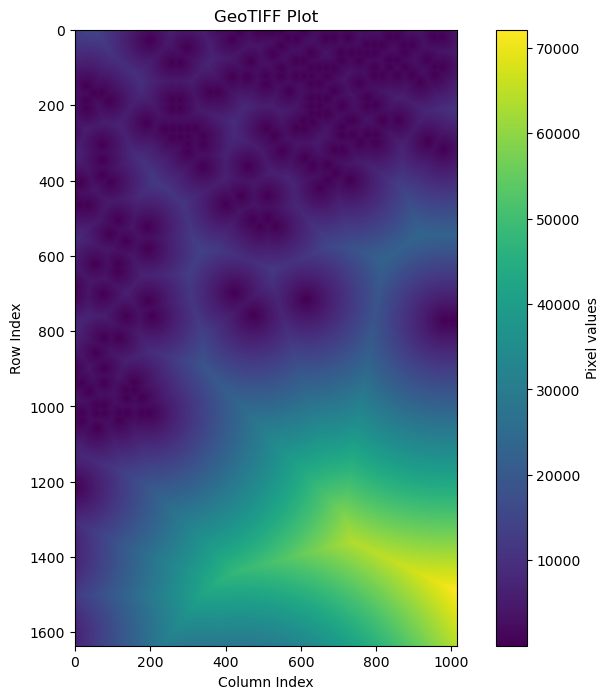

In [165]:
import rasterio
import matplotlib.pyplot as plt


with rasterio.open('dist_to_ratio_K2O_Na2O.tif') as src:
    raster_data = src.read(1)  
    plt.figure(figsize=(10, 8))
    plt.imshow(raster_data, cmap='viridis')  
    plt.colorbar(label='Pixel values')
    plt.title('GeoTIFF Plot')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()

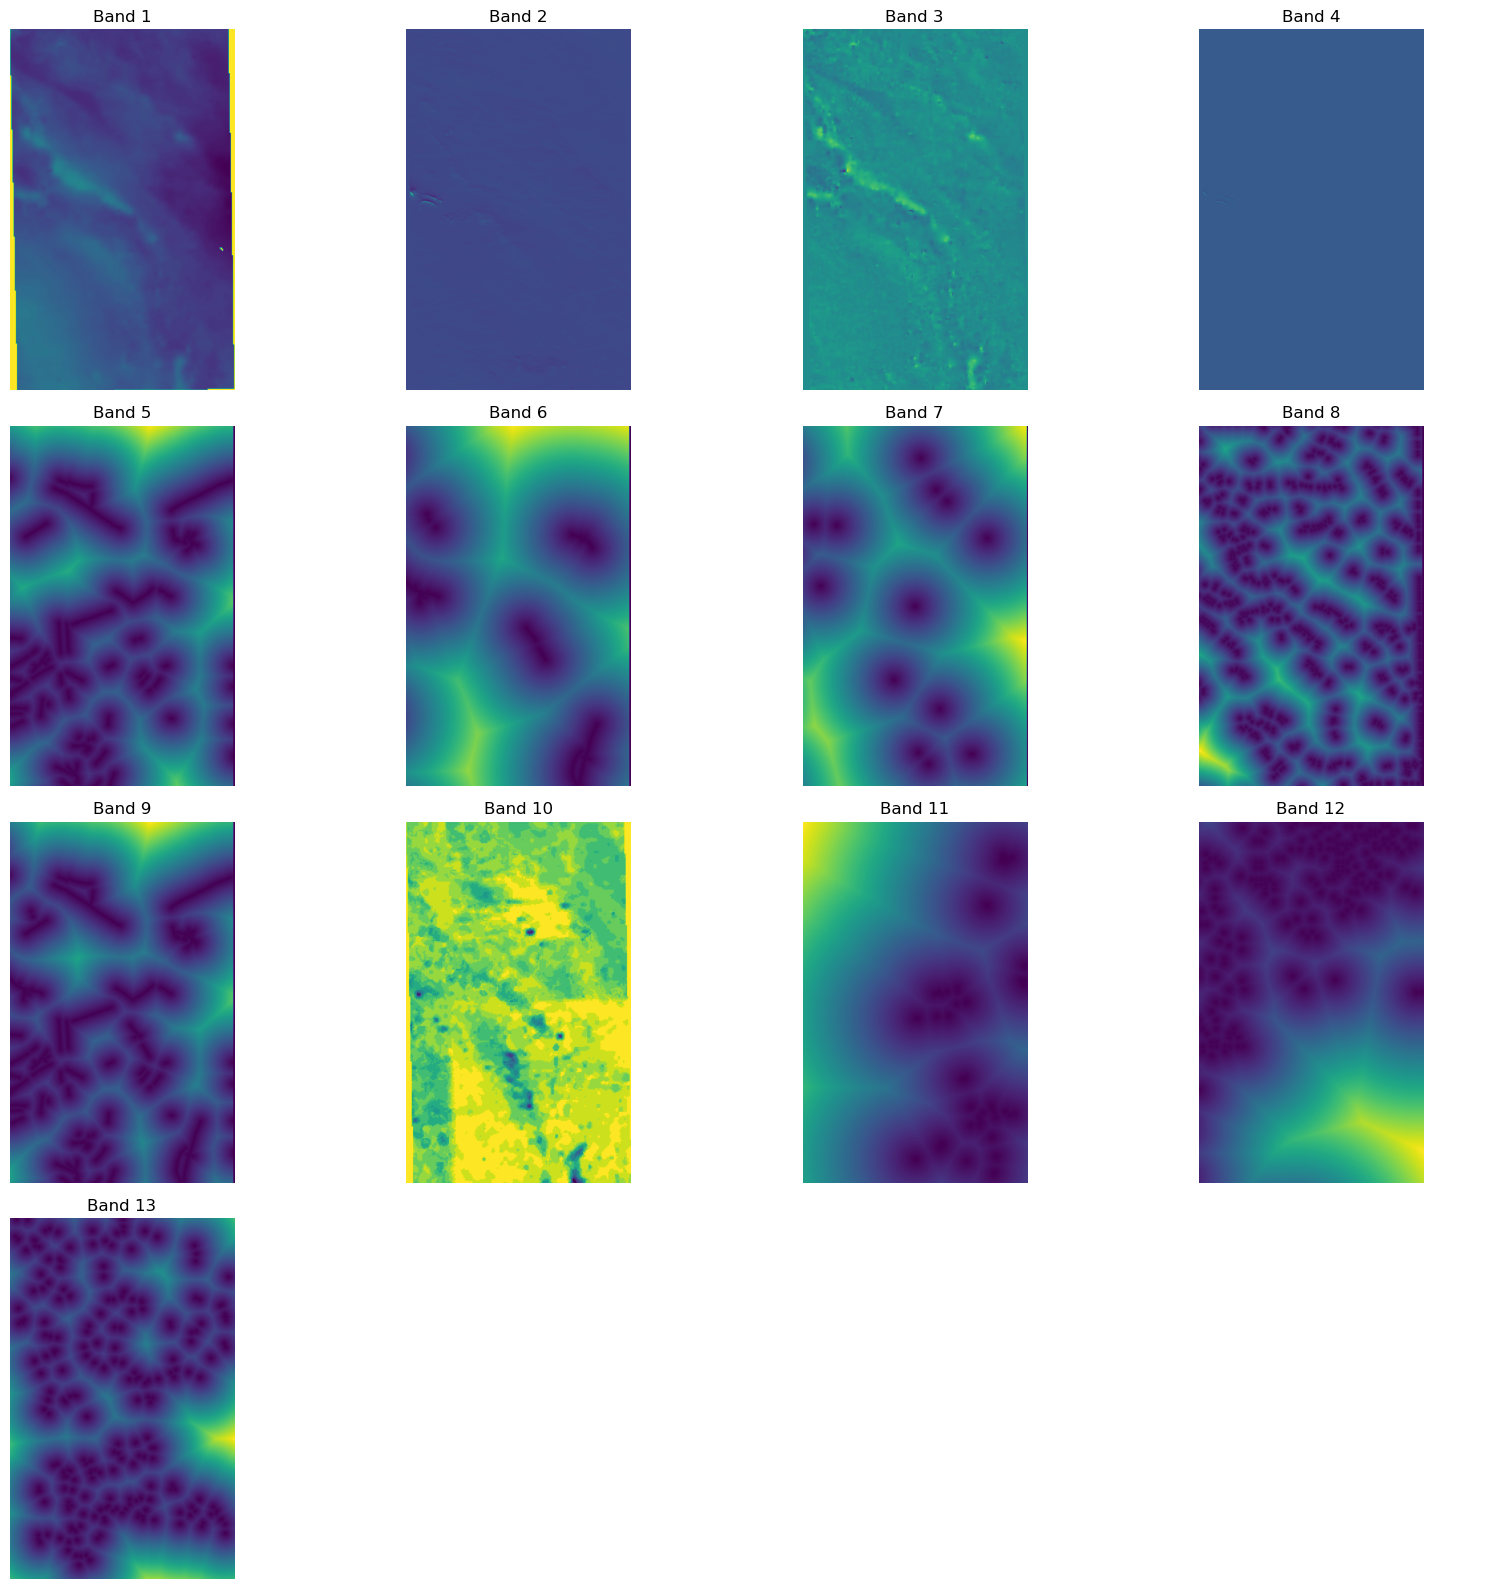

In [109]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("final_stacked_kimb_mod.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  
        if nodata is None:
            band = np.where(band == nodata, np.nan, band)
        bands.append(band)


cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [111]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np

with rasterio.open("final_stacked_kimb_mod.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)] 
    rows, cols = src.shape  

    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)


data = {
    "Longitude": xs,
    "Latitude": ys,
}

for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band


df_kimb = pd.DataFrame(data)


In [113]:
df_kimb.shape

(1663192, 15)

In [115]:
df_kimb

Longitude      Latitude     Band_1     Band_2    Band_3    Band_4  \
0        695614.73098  1.740257e+06   0.000000   0.000000  0.000000  0.000000   
1        695714.73098  1.740257e+06   0.000000 -39.973640  0.000000  0.007290   
2        695814.73098  1.740257e+06 -76.282608 -37.760284  0.005463  0.006927   
3        695914.73098  1.740257e+06 -76.282608 -34.886192  0.005463  0.016226   
4        696014.73098  1.740257e+06 -76.282608 -32.684429  0.005463  0.018152   
...               ...           ...        ...        ...       ...       ...   
1663187  796714.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663188  796814.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663189  796914.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663190  797014.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   
1663191  797114.73098  1.576657e+06   0.000000   0.000000  0.000000  0.000000   

               Band_5        Band_6        Band_7       Band_8        Band_9  \
0        21579.925781  16228.862305  21326.343750  4200.753418  16228.862305   
1        21609.582031  16280.531250  21385.009766  4264.836426  16280.531250   
2        21639.660156  16332.649414  21443.978516  4330.280273  16332.649414   
3        21670.158203  16385.212891  21503.251953  4397.024902  16385.212891   
4        21701.074219  16438.214844  21562.826172  4465.011719  16438.214844   
...               ...           ...           ...          ...           ...   
1663187      0.000000      0.000000      0.000000     0.000000      0.000000   
1663188      0.000000      0.000000      0.000000     0.000000      0.000000   
1663189      0.000000      0.000000      0.000000     0.000000      0.000000   
1663190      0.000000      0.000000      0.000000     0.000000      0.000000   
1663191      0.000000      0.000000      0.000000     0.000000      0.000000   

          Band_10       Band_11       Band_12       Band_13  
0        1.000000  90589.765625  12015.268555   2793.173584  
1        1.000000  90498.773438  12097.406250   2694.725098  
2        0.769231  90407.796875  12179.811523   2596.361328  
3        0.769231  90316.851562  12262.477539   2498.017090  
4        0.769231  90225.914062  12345.401367   2399.791504  
...           ...           ...           ...           ...  
1663187  0.846154  15316.823242  64237.984375  20836.949219  
1663188  0.846154  15413.038086  64327.640625  20855.369141  
1663189  0.846154  15509.301758  64417.328125  20874.251953  
1663190  0.846154  15605.612305  64507.042969  20893.595703  
1663191  0.846154  15700.751953  64596.789062  20913.398438  

[1663192 rows x 15 columns]

In [117]:
import geopandas as gpd
df_kimb_gdf = gpd.GeoDataFrame(df_kimb, geometry=gpd.points_from_xy(df_kimb.Longitude, df_kimb.Latitude), crs="EPSG:32643")

In [183]:
from shapely.geometry import shape


points = [shape(geom) for geom in df_mod_gdf['geometry'] if geom is not None]
points1 = [shape(geom) for geom in df_deposit_gdf['geometry'] if geom is not None]

In [187]:
from shapely.strtree import STRtree
import numpy as np

points = df_mod_gdf['geometry'].dropna().tolist()


tree_points = STRtree(points1)


def min_distance(point, tree, geometries):
    nearest_idx = tree.nearest(point)
    nearest_geom = geometries[nearest_idx]
    return point.distance(nearest_geom)


df_mod_gdf['min_dist_to_deposit'] = [min_distance(point, tree_points, points1) for point in points]


In [193]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin

gdf = df_mod_gdf
value_column = 'min_dist_to_deposit'

pixel_size = 100  
minx, miny, maxx, maxy = df_mod_gdf.total_bounds  
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)
transform = from_origin(minx, maxy, pixel_size, pixel_size)  
out_shape = (height, width)


shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf[value_column]))

raster = rasterize(shapes=shapes, out_shape=out_shape, transform=transform)

with rasterio.open(
    'dist_to_deposit_kimb.tif',
    'w',
    driver='GTiff',
    height=out_shape[0],
    width=out_shape[1],
    count=1,
    dtype=raster.dtype,
    crs=gdf.crs,
    transform=transform
) as dst:
    dst.write(raster, 1)

In [ ]:
#### Finding non-deposit locations using SOM (Additional) ####

In [199]:
!pip install minisom

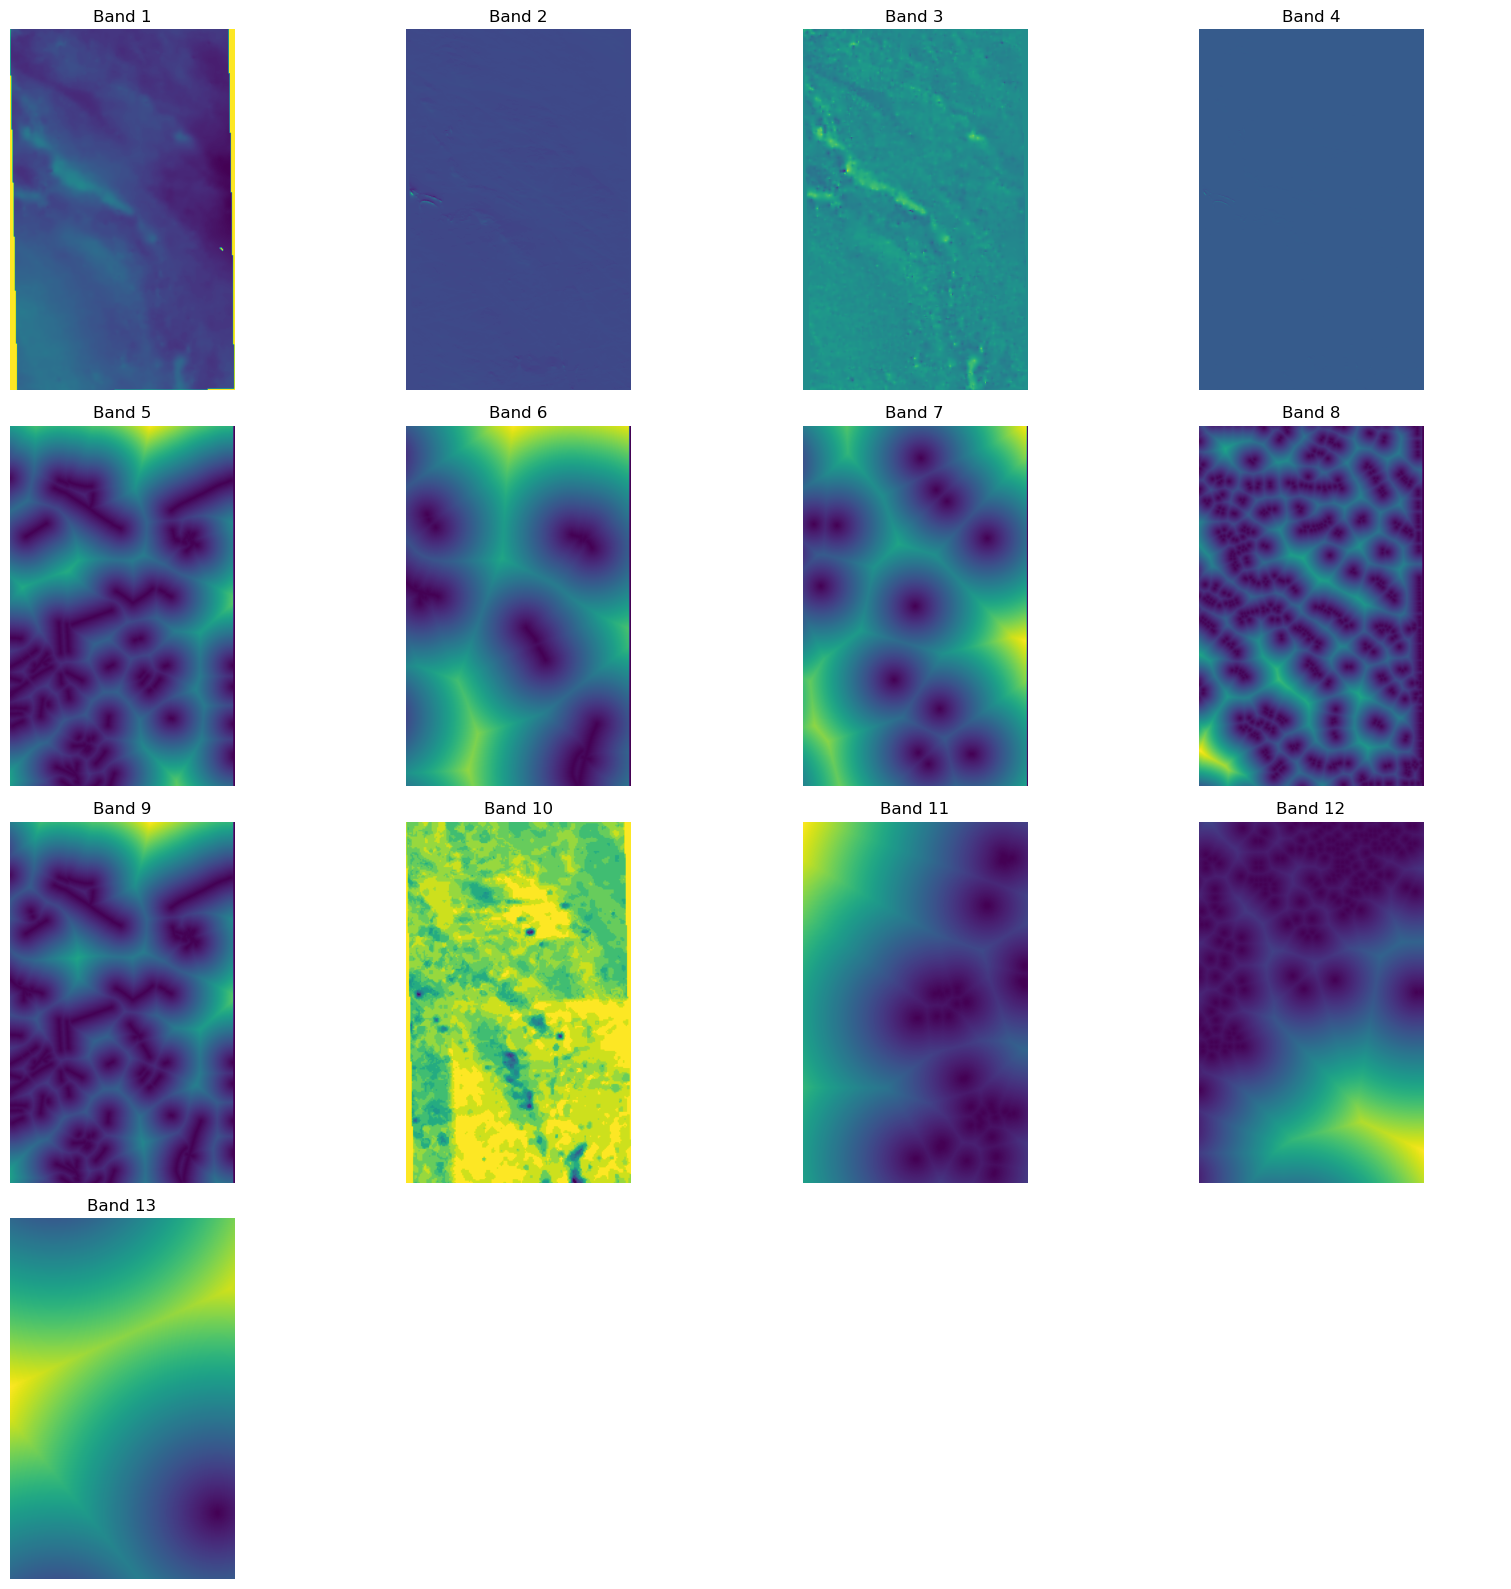

In [197]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


with rasterio.open("SOM_kimb.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  
        if nodata is None:
            band = np.where(band == nodata, np.nan, band)
        
        bands.append(band)

cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [1]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np


with rasterio.open("SOM_kimb.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)]  
    rows, cols = src.shape  

    
    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)


data = {
    "Longitude": xs,
    "Latitude": ys,
}


for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band


df_SOM_kimb = pd.DataFrame(data)

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



def load_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read()  # Read all bands
        profile = src.profile  # Store metadata
    return data, profile

file_path = "SOM_kimb.tif"
data, profile = load_geotiff(file_path)

data_reshaped = data.reshape(data.shape[0], -1).T  
data_cleaned = data_reshaped[~np.isnan(data_reshaped).any(axis=1)]  

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)


In [5]:
data_scaled

array([[1.        , 0.21914402, 0.49078038, ..., 0.16660713, 0.33688766,
        0.08845877],
       [1.        , 0.21705942, 0.49078038, ..., 0.16774617, 0.33640358,
        0.08534094],
       [0.301327  , 0.21717484, 0.65153825, ..., 0.16888893, 0.33592126,
        0.0822258 ],
       ...,
       [1.        , 0.21914402, 0.49078038, ..., 0.8932945 , 0.28142753,
        0.66107976],
       [1.        , 0.21914402, 0.49078038, ..., 0.89453864, 0.28165373,
        0.6616924 ],
       [1.        , 0.21914402, 0.49078038, ..., 0.8957832 , 0.2818827 ,
        0.66231954]], dtype=float32)

In [7]:
data_scaled.shape

(1663192, 14)

In [9]:
som = MiniSom(x = 5, y = 5, input_len = data_scaled.shape[1], sigma = 0.5, learning_rate = 0.5,neighborhood_function='gaussian', random_seed=42)

In [11]:
som.random_weights_init(data_scaled)

In [13]:
som.train_random(data_scaled, num_iteration=1000)

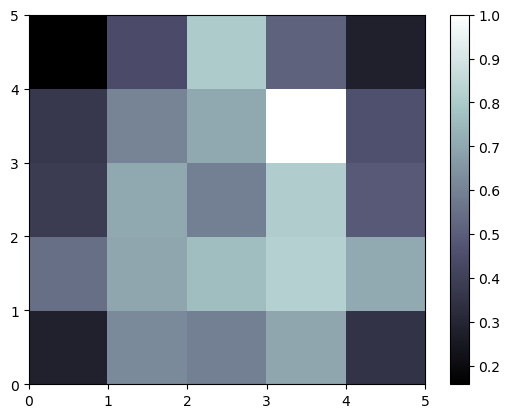

In [15]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

show()

In [17]:
winner_coordinates = np.array([som.winner(x) for x in data_scaled])

In [19]:
cluster_map = np.ravel_multi_index(winner_coordinates.T, (5,5))


In [21]:
clustered_raster = np.full(data_reshaped.shape[0], np.nan)  
clustered_raster[~np.isnan(data_reshaped).any(axis=1)] = cluster_map  
clustered_raster = clustered_raster.reshape(profile["height"], profile["width"])

In [23]:
clustered_raster.shape

(1637, 1016)

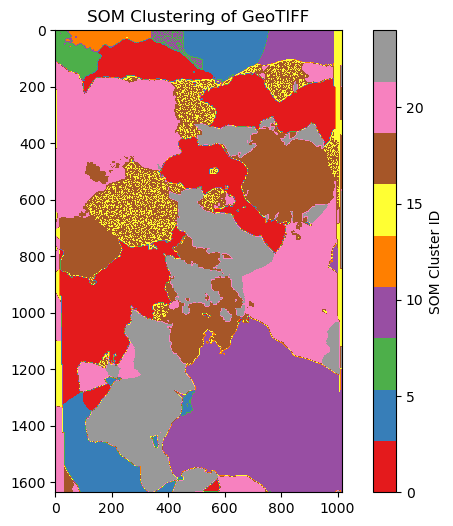

In [25]:
plt.figure(figsize=(8, 6))
plt.imshow(clustered_raster, cmap="Set1")
plt.colorbar(label="SOM Cluster ID")
plt.title("SOM Clustering of GeoTIFF")
plt.show()

In [481]:
num_nans = np.sum(np.isnan(data_scaled))
print(f"Total number of NaN values in data_scaled: {num_nans}")

Total number of NaN values in data_scaled: 0


In [435]:
df_SOM_kimb.shape

(1663192, 16)

In [437]:
df_SOM_kimb.isna().sum()

Longitude    0
Latitude     0
Band_1       0
Band_2       0
Band_3       0
Band_4       0
Band_5       0
Band_6       0
Band_7       0
Band_8       0
Band_9       0
Band_10      0
Band_11      0
Band_12      0
Band_13      0
Band_14      0
dtype: int64

In [27]:
import numpy as np


winners = np.array([som.winner(x) for x in data_scaled])


cluster_map = {(i, j): f'Cluster{i * 5 + j}' for i in range(5) for j in range(5)}

clusters = np.array([cluster_map[tuple(w)] for w in winners])

df_SOM_kimb['Cluster'] = clusters


In [29]:
import geopandas as gpd
df_SOM_gdf = gpd.GeoDataFrame(df_SOM_kimb, geometry=gpd.points_from_xy(df_SOM_kimb.Longitude, df_SOM_kimb.Latitude), crs="EPSG:32643")

In [31]:
df_SOM_gdf.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

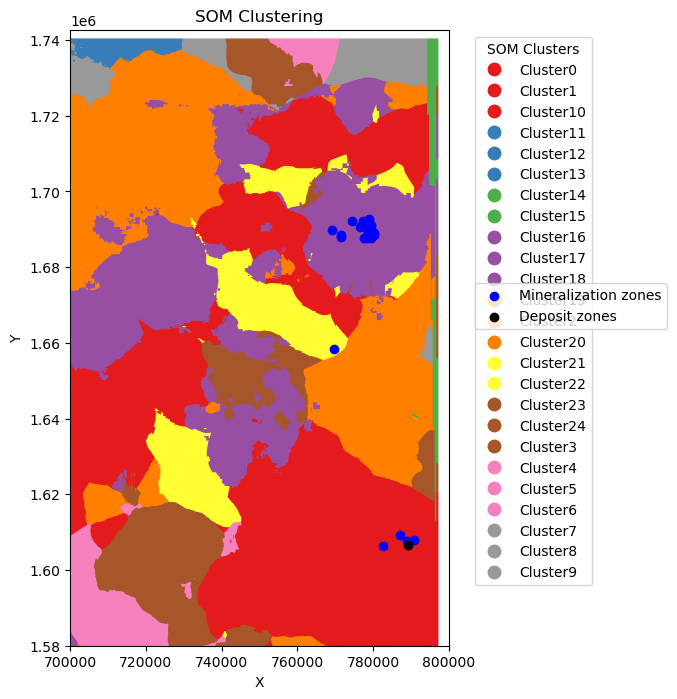

In [497]:
fig, ax = plt.subplots(figsize=(8,8))
df_SOM_gdf.plot(ax=ax,column='Cluster', cmap='Set1', legend=True)
df_min.plot(ax=ax, color = 'blue', label='Mineralization zones')
df_deposit_gdf.plot(ax=ax, color='black', label='Deposit zones')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SOM Clustering")
legend1 = ax.get_legend()
if legend1:
    legend1.set_bbox_to_anchor((1.05, 1))
    legend1.set_title("SOM Clusters")
legend2 = ax.legend(bbox_to_anchor=(1.05, 0.6), loc='upper left')
ax.set_xlim(700000, 800000)
ax.set_ylim(1580000, 1742700)
ax.add_artist(legend1)
plt.show()

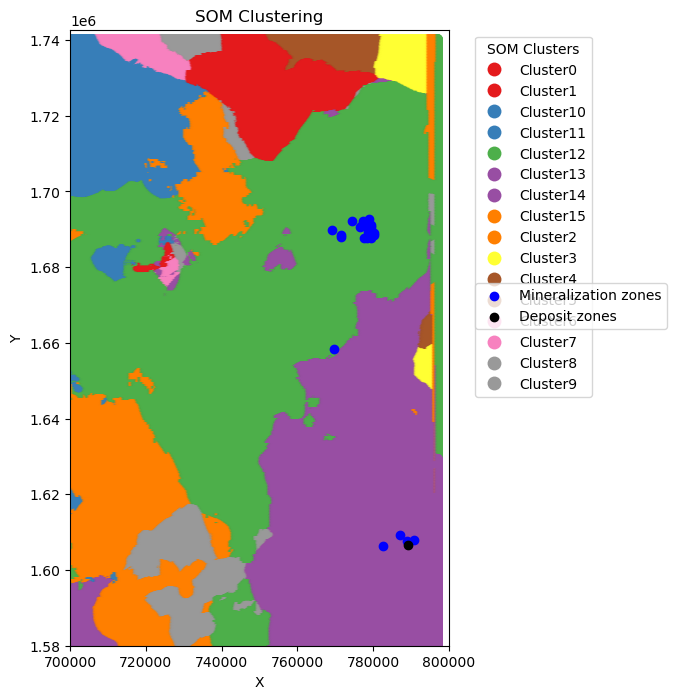

In [445]:
fig, ax = plt.subplots(figsize=(8,8))
df_SOM_gdf.plot(ax=ax,column='Cluster', cmap='Set1', legend=True)
df_min.plot(ax=ax, color = 'blue', label='Mineralization zones')
df_deposit_gdf.plot(ax=ax, color='black', label='Deposit zones')
#plt.xlimit()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SOM Clustering")
legend1 = ax.get_legend()
if legend1:
    legend1.set_bbox_to_anchor((1.05, 1))
    legend1.set_title("SOM Clusters")
legend2 = ax.legend(bbox_to_anchor=(1.05, 0.6), loc='upper left')
ax.set_xlim(700000, 800000)
ax.set_ylim(1580000, 1742700)
ax.add_artist(legend1)
plt.show()

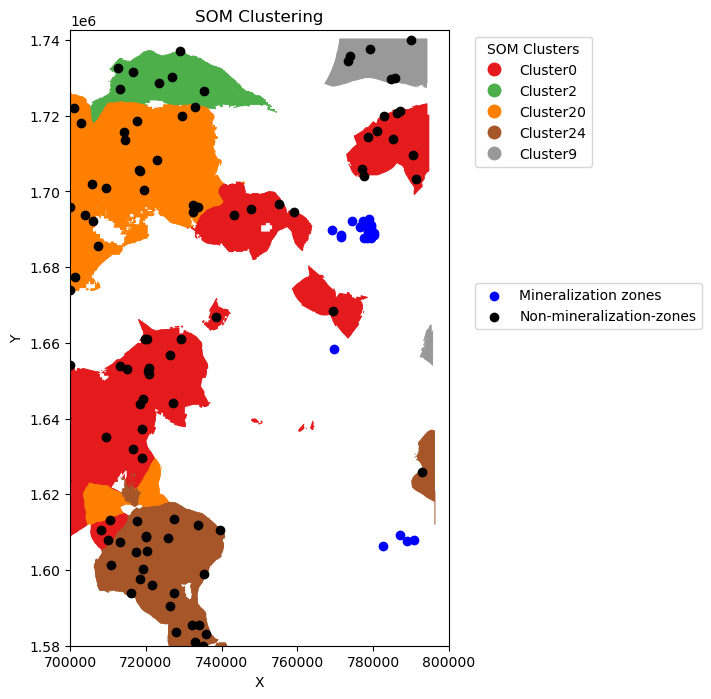

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
df_SOM_gdf[df_SOM_gdf['Cluster'].isin(['Cluster0','Cluster20','Cluster24','Cluster2','Cluster9'])].plot(ax=ax, column='Cluster', cmap='Set1', legend=True)
df_min.plot(ax=ax, color='blue',label='Mineralization zones')
df_non_deposits_gpd.plot(ax=ax, color='black',label='Non-mineralization-zones')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SOM Clustering")
legend1 = ax.get_legend()
if legend1:
    legend1.set_bbox_to_anchor((1.05, 1))
    legend1.set_title("SOM Clusters")
legend2 = ax.legend(bbox_to_anchor=(1.05, 0.6), loc='upper left')
ax.set_xlim(700000, 800000)
ax.set_ylim(1580000, 1742700)
ax.add_artist(legend1)
plt.show()

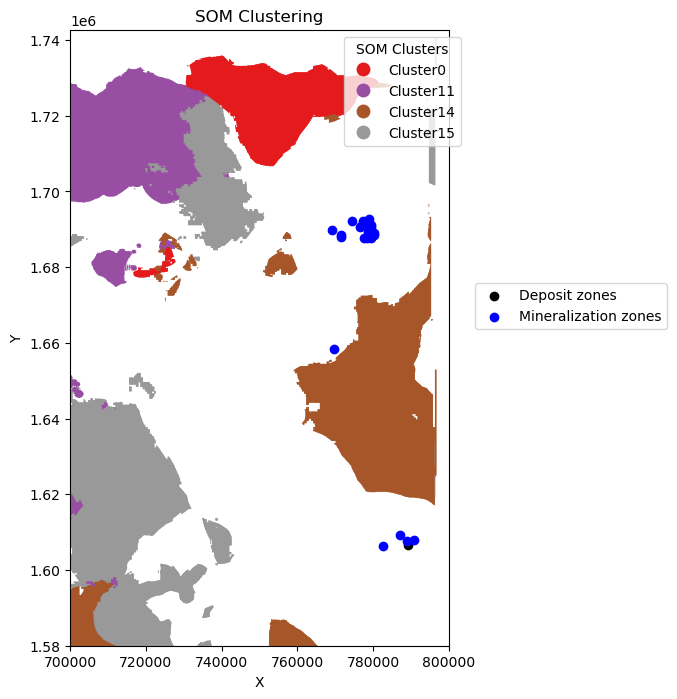

In [461]:
fig, ax = plt.subplots(figsize=(8,8))
df_SOM_gdf[df_SOM_gdf['Cluster'].isin(['Cluster15','Cluster14','Cluster11','Cluster0'])].plot(ax=ax, column='Cluster', cmap='Set1', legend=True)
df_deposit_gdf.plot(ax=ax, color = 'black', label='Deposit zones')
df_min.plot(ax=ax, color='blue',label='Mineralization zones')
#plt.xlimit()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SOM Clustering")
legend1 = ax.get_legend()
if legend1:
    legend1.set_bbox_to_anchor((1.05, 1))
    legend1.set_title("SOM Clusters")
legend2 = ax.legend(bbox_to_anchor=(1.05, 0.6), loc='upper left')
ax.set_xlim(700000, 800000)
ax.set_ylim(1580000, 1742700)
ax.add_artist(legend1)
plt.show()

In [65]:
cluster_frequencies = df_SOM_gdf['Cluster'].value_counts().sort_values(ascending=False)
print(cluster_frequencies)


Cluster
Cluster10    278211
Cluster0     205458
Cluster18    183112
Cluster20    168704
Cluster19    139849
Cluster16    128343
Cluster22    110651
Cluster24     94198
Cluster5      59485
Cluster1      50987
Cluster23     45259
Cluster2      43936
Cluster9      30533
Cluster3      27091
Cluster15     20305
Cluster21     17540
Cluster7      16243
Cluster4      11524
Cluster8       9165
Cluster11      6153
Cluster14      5915
Cluster12      5047
Cluster13      3328
Cluster17      2123
Cluster6         32
Name: count, dtype: int64


In [75]:
df_cluster = df_SOM_gdf

In [77]:
df_cluster['geometry'] = df_cluster.geometry.buffer(100)

In [79]:
import geopandas as gpd
from shapely.geometry import Point

joined = gpd.sjoin(df_cluster, df_min, how='right', predicate='contains')
min_cluster_counts = joined['Cluster'].value_counts()

print("Mineralization counts per cluster:", min_cluster_counts.to_dict())


Mineralization counts per cluster: {'Cluster18': 74, 'Cluster10': 11, 'Cluster22': 4}


In [81]:
df_cluster.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
df_non_deposits = df_SOM_gdf[df_SOM_gdf['Cluster'].isin(['Cluster0','Cluster20','Cluster24','Cluster2','Cluster9'])].sample(n=100, axis=0, ignore_index=False)

In [85]:
df_non_deposits.shape

(100, 18)

In [87]:
df_non_deposits.columns

Index(['Longitude', 'Latitude', 'Band_1', 'Band_2', 'Band_3', 'Band_4',
       'Band_5', 'Band_6', 'Band_7', 'Band_8', 'Band_9', 'Band_10', 'Band_11',
       'Band_12', 'Band_13', 'Band_14', 'Cluster', 'geometry'],
      dtype='object')

In [89]:
df_non_deposits_gpd = gpd.GeoDataFrame(df_non_deposits, geometry=gpd.points_from_xy(df_non_deposits.Longitude, df_non_deposits.Latitude), crs="EPSG:32643")

In [95]:
df_non_deposits_gpd.to_csv("non_deposits_kimb.csv")

In [ ]:
############### Making the training dataset ###############################################

In [301]:
df_non_deposits = pd.read_csv("non_deposits_kimb_buffer.csv")

In [283]:
from rasterio.windows import Window

def crop_windows(centers, window_size):
    width, height = src.width, src.height
    half = window_size // 2
    windows = []

    for x, y in centers:
        
        col = int((x - src.transform.c) / src.transform.a)
        row = int((y - src.transform.f) / src.transform.e)

        
        row_start = max(row - half, 0)
        row_end = min(row + half, height)
        col_start = max(col - half, 0)
        col_end = min(col + half, width)

        
        if row_end > row_start and col_end > col_start:
            window = Window(col_start, row_start, col_end - col_start, row_end - row_start)
            windows.append(window)
        else:
            print(f"Skipped invalid window at X={x}, Y={y} (row: {row_start}-{row_end}, col: {col_start}-{col_end})")

    return windows

In [133]:
import geopandas as gpd
from shapely.geometry import box


gdf_1 = df_deposit_gdf
gdf_2 = df_min

minx, miny, maxx, maxy = 695564.730980, 1576577.15006, 797166.491165, 1740307.0136
bbox = box(minx, miny, maxx, maxy)


bbox_gdf = gpd.GeoDataFrame([1], geometry=[bbox], crs=gdf_1.crs)


clipped_deposit = gpd.clip(gdf_1, bbox_gdf)
clipped_min =  gpd.clip(gdf_2, bbox_gdf)

In [135]:
clipped_min.shape

(29, 4)

In [137]:
df_min.columns

Index(['commodity', 'geometry', 'X', 'Y'], dtype='object')

In [293]:
deposit_centers= []

In [295]:
deposit_centers = clipped_deposit[['X', 'Y']].values.tolist() + clipped_min[['X', 'Y']].values.tolist()


In [297]:
len(deposit_centers)

30

In [133]:
deposit_centers

[[789209.2132806416, 1606566.7572461804],
 [782636.9626703179, 1606306.3283531545],
 [788871.68796633, 1607652.052379544],
 [790800.8566811926, 1607947.5990525426],
 [787208.5770832435, 1609210.4089893715],
 [779491.0177225324, 1687747.4646278443],
 [779437.6854965619, 1688406.0612444617],
 [780254.8500035796, 1688462.1589172238],
 [780181.3796211882, 1689018.9836152687],
 [779481.4488543607, 1689163.4901782896],
 [779364.3620548935, 1689855.9175214292],
 [769590.9670505476, 1658305.8955072605],
 [777648.4056666198, 1687711.3568578763],
 [778324.3244683743, 1687788.1175037974],
 [771421.9130277024, 1687902.337190756],
 [771447.7958386812, 1688375.5183219705],
 [778720.2810791389, 1688538.9609772179],
 [778638.2016051488, 1689228.8009233044],
 [769060.8433812605, 1689774.7313101222],
 [776631.2515412176, 1690538.1299963733],
 [776913.3252389701, 1690851.8625229653],
 [779423.7568779304, 1690484.720174614],
 [779369.0848106041, 1690997.5207059118],
 [778889.8604407602, 1691025.0632718003

In [303]:
df_non_deposits.columns

Index(['Unnamed: 0', 'Longitude', 'Latitude', 'Band_1', 'Band_2', 'Band_3',
       'Band_4', 'Band_5', 'Band_6', 'Band_7', 'Band_8', 'Band_9', 'Band_10',
       'Band_11', 'Band_12', 'Band_13', 'geometry'],
      dtype='object')

In [305]:
non_deposit_centers = df_non_deposits[['Longitude','Latitude']].values.tolist()

In [307]:
len(non_deposit_centers)

100

In [309]:
deposit_windows = crop_windows(deposit_centers, window_size=50)

In [311]:
len(deposit_windows)

30

In [313]:
non_deposit_windows = crop_windows(non_deposit_centers, window_size = 50)

In [147]:
import tensorflow as tf

In [315]:
from rasterio.windows import transform
import numpy as np
import os
import rasterio


NODATA_THRESHOLD = 0.9

for i, window in enumerate(deposit_windows):
    with rasterio.open("final_stacked_kimb_mod.tif") as src:
        nodata_val = src.nodata  

        
        patch = src.read(window=window)  

        if nodata_val is not None:
            nodata_mask = (patch == nodata_val)
            nodata_fraction = np.mean(nodata_mask)

            if nodata_fraction > NODATA_THRESHOLD:
                print(f"Skipping patch {i} due to high NoData fraction: {nodata_fraction:.2f}")
                continue  

        
        profile = src.profile
        profile.update({
            "height": window.height,
            "width":  window.width,
            "transform": transform(window, src.transform)
        })

        output_path = os.path.join("train_dir_kimb", "1", f"deposit_output_{i}.tiff")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        with rasterio.open(output_path, "w", **profile) as dst:
            dst.write(patch)
            


In [317]:
from rasterio.windows import transform


for i, window in enumerate(non_deposit_windows):
    with rasterio.open("final_stacked_kimb_mod.tif") as src:
        profile = src.profile  
        profile.update({
        "height": window.height,
        "width":  window.width,
        "transform": transform(window, src.transform)
        })
        output_path = os.path.join("train_dir_kimb", "0", f"non_deposit_output_{i}.tiff")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        with rasterio.open(output_path, "w", **profile) as dst:
            for i in range(1, src.count + 1):  
                dst.write(src.read(i, window=window), i)

In [151]:
import os
import numpy as np
import tifffile as tiff
import albumentations as A
import rasterio
from rasterio.transform import from_origin


train_dir = "train_dir_kimb_new"
output_dir = "augmented_dir_kimb_new"

os.makedirs(output_dir, exist_ok=True)


augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),         # Flip horizontally
    A.VerticalFlip(p=0.5),           # Flip vertically
    A.RandomRotate90(p=0.5),         # Random 90-degree rotation
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=45, p=0.5),  # Shift, scale, rotate
    A.GaussianBlur(blur_limit=(3,5), p=0.2),  
    A.Resize(50, 50, always_apply=True)
], additional_targets={"image": "image"}) 

def augment_4band_tiff(class_name, num_augmented_images=100):
    class_path = os.path.join(train_dir, class_name)
    save_path = os.path.join(output_dir, class_name)
    os.makedirs(save_path, exist_ok=True)

    for filename in os.listdir(class_path):
        if filename.lower().endswith(".tiff") or filename.lower().endswith(".tif"):
            original_file_path = os.path.join(class_path, filename)
            try:
                with rasterio.open(original_file_path) as src:
                    original_img = src.read()  
                    original_profile = src.profile

                    if original_img.shape[0] != 13 or original_img.shape[1] != 50 or original_img.shape[2] != 50:
                        print(f"Skipping {original_file_path}: Not a 13-band image with shape (50, 50)")
                        continue

                    for i in range(num_augmented_images):
                        augmented = augmentations(image=original_img.transpose(1, 2, 0)) 
                        aug_img = augmented["image"].transpose(2, 0, 1) 

                        aug_filename = f"aug_{os.path.splitext(filename)[0]}_{i}.tiff"
                        aug_file_path = os.path.join(save_path, aug_filename)

                        
                        with rasterio.open(aug_file_path, 'w', **original_profile) as dst:
                            dst.write(aug_img.astype(original_profile['dtype']))

                

            except Exception as e:
                print(f"Error processing {original_file_path}: {e}")

# Run for both classes
augment_4band_tiff("1")
augment_4band_tiff("0")

print("Augmentation complete.")

/opt/anaconda3/lib/python3.12/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/anaconda3/lib/python3.12/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/var/folders/cj/c3lxhrz916l_n171dhdhbg8h0000gp/T/ipykernel_3553/1242141942.py:21: UserWarning: Argument(s) 'always_apply' are not valid for transform Resize
  A.Resize(50, 50, always_apply=True)


Skipping train_dir_kimb_new/0/non_deposit_output_55.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_43.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_82.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_16.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_76.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_95.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_11.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_85.tiff: Not a 13-band image with shape (50, 50)
Skipping train_dir_kimb_new/0/non_deposit_output_27.tiff: Not a 13-band image with shape (50, 50)
Augmentation complete.


In [155]:
import os
import numpy as np
from osgeo import gdal

# Define constants
WINDOW_SIZE = (50, 50)  
STEP_SIZE = 20  
test_dir = "test_dir_kimb_new"
patch_dir = os.path.join("test_dir_kimb_new", "patches")  
os.makedirs(patch_dir, exist_ok=True)  

def save_tiff(array, filename, geotransform, projection):
    """Save an image patch as a GeoTIFF file"""
    driver = gdal.GetDriverByName("GTiff")
    H, W, bands = array.shape
    dataset = driver.Create(filename, W, H, bands, gdal.GDT_Float32)

    if dataset is None:
        print(f" ERROR: Failed to create {filename}")
        return

    dataset.SetGeoTransform(geotransform)
    dataset.SetProjection(projection)

    for b in range(bands):
        dataset.GetRasterBand(b + 1).WriteArray(array[:, :, b])

    dataset.FlushCache()
    dataset = None  
    print(f" Saved: {filename}")

def generate_patches():
    patch_id = 0
    for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)
        print(f" Processing: {file_path}")

        dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
        if dataset is None:
            print(f" ERROR: Unable to open {file_path}. Skipping...")
            continue

        geotransform = dataset.GetGeoTransform()
        projection = dataset.GetProjection()
        img = dataset.ReadAsArray()

        if img is None:
            print(f"⚠️ ERROR: Could not read {file_path}. Skipping...")
            continue

        nodata_val = dataset.GetRasterBand(1).GetNoDataValue()
        if nodata_val is not None:
            nodata_mask = (img == nodata_val)
        else:
            nodata_mask = np.zeros_like(img, dtype=bool)

        img = np.moveaxis(img, 0, -1)  
        nodata_mask = np.moveaxis(nodata_mask, 0, -1)  

        H, W, _ = img.shape

        for i in range(0, H - WINDOW_SIZE[0] + 1, STEP_SIZE):
            for j in range(0, W - WINDOW_SIZE[1] + 1, STEP_SIZE):
                patch = img[i:i+WINDOW_SIZE[0], j:j+WINDOW_SIZE[1], :]
                patch_mask = nodata_mask[i:i+WINDOW_SIZE[0], j:j+WINDOW_SIZE[1], :]

                
                if np.mean(patch_mask) > 0.9:
                    continue  

                new_geotransform = (
                    geotransform[0] + j * geotransform[1],
                    geotransform[1],
                    geotransform[2],
                    geotransform[3] + i * geotransform[5],
                    geotransform[4],
                    geotransform[5]
                )

                patch_filename = os.path.join(patch_dir, f"test_patch_{patch_id}.tif")
                save_tiff(patch, patch_filename, new_geotransform, projection)
                patch_id += 1

        

generate_patches()

 Processing: test_dir_kimb_new/patches
 ERROR: Unable to open test_dir_kimb_new/patches. Skipping...
 Processing: test_dir_kimb_new/final_stacked_kimb_mod.tif
 Saved: test_dir_kimb_new/patches/test_patch_0.tif
 Saved: test_dir_kimb_new/patches/test_patch_1.tif
 Saved: test_dir_kimb_new/patches/test_patch_2.tif
 Saved: test_dir_kimb_new/patches/test_patch_3.tif
 Saved: test_dir_kimb_new/patches/test_patch_4.tif
 Saved: test_dir_kimb_new/patches/test_patch_5.tif
 Saved: test_dir_kimb_new/patches/test_patch_6.tif
 Saved: test_dir_kimb_new/patches/test_patch_7.tif
 Saved: test_dir_kimb_new/patches/test_patch_8.tif
 Saved: test_dir_kimb_new/patches/test_patch_9.tif
 Saved: test_dir_kimb_new/patches/test_patch_10.tif
 Saved: test_dir_kimb_new/patches/test_patch_11.tif
 Saved: test_dir_kimb_new/patches/test_patch_12.tif
 Saved: test_dir_kimb_new/patches/test_patch_13.tif
 Saved: test_dir_kimb_new/patches/test_patch_14.tif
 Saved: test_dir_kimb_new/patches/test_patch_15.tif
 Saved: test_dir_ki

In [85]:
train_dir = "train_dir_kimb_new"

import os
IMG_SIZE = 50


def load_tiff_data(train_dir, class_name):
    class_path = os.path.join(train_dir, class_name)
    X, Y = [], []
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)
        dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
        if dataset is None:
            print(f"Skipping {filename}, could not be opened.")
            continue
        img = dataset.ReadAsArray()
        img = np.moveaxis(img, 0, -1)

        if img.shape[:2] != (IMG_SIZE, IMG_SIZE):
            print(f"Skipping {filename}, incorrect shape: {img.shape}")
            continue

        

        X.append(img)
        Y.append(int(class_name))
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.int32)

X1,Y1 = load_tiff_data("train_dir_kimb_new","1")
X0,Y0 = load_tiff_data("train_dir_kimb_new","0")

Skipping non_deposit_output_87.tiff, incorrect shape: (50, 46, 13)
Skipping non_deposit_output_75.tiff, incorrect shape: (50, 25, 13)
Skipping non_deposit_output_19.tiff, incorrect shape: (47, 50, 13)


In [87]:
X1.shape

(3030, 50, 50, 13)

In [89]:
X0.shape

(9797, 50, 50, 13)

In [91]:
np.sum(np.isnan(X0))

0

In [93]:
valid_mask = ~np.isnan(X1).any(axis=(1, 2, 3))  


X1_clean = X1[valid_mask]
Y1_clean = Y1[valid_mask]

print("Original shape:", X1.shape)
print("Clean shape:", X1_clean.shape)
print("Clean shape:", Y1_clean.shape)

Original shape: (3030, 50, 50, 13)
Clean shape: (3030, 50, 50, 13)
Clean shape: (3030,)


In [95]:
X = np.concatenate((X1_clean, X0), axis=0)

In [97]:
X.shape

(12827, 50, 50, 13)

In [99]:
Y = np.concatenate((Y1_clean,Y0), axis =0)

In [101]:
Y.shape

(12827,)

In [103]:
test_dir = "test_dir_kimb_new/patches"
IMG_SIZE = 50
#BANDS = 16
def load_test_data(test_dir):
    X_test = []
    coords  = []

    for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)
        dataset = gdal.Open(file_path, gdal.GA_ReadOnly)

        if dataset is None:
            print(f"Skipping {filename}, could not be opened")
            continue

        img = dataset.ReadAsArray()
        img = np.moveaxis(img, 0, -1)

        if img.shape[:2] != (IMG_SIZE, IMG_SIZE):
            print(f"Skipping {filename}, incorrect shape: {img.shape}")
            continue

        

        geotransform = dataset.GetGeoTransform()
        if geotransform is None:
            print(f"Skipping {filename}, missing geotransform.")
            continue

        # Calculate center coordinates
        X_center = geotransform[0] + (IMG_SIZE / 2) * geotransform[1]
        Y_center = geotransform[3] + (IMG_SIZE / 2) * geotransform[5]

        X_test.append(img)
        coords.append([X_center, Y_center])

    return np.array(X_test, dtype=np.float32), np.array(coords, dtype=np.float32)

result = load_test_data(test_dir)

if isinstance(result, tuple) and len(result) ==2:
    X_test, center_coords = result
else:
    raise ValueError("Unexpected return structure from load_test_data_with_center_coords")


In [47]:
X_test.shape

(3920, 50, 50, 13)

In [105]:
valid_mask = ~np.isnan(X_test).any(axis=(1, 2, 3))  

X_test_clean = X_test[valid_mask]


print("Original shape:", X_test.shape)
print("Clean shape:", X_test_clean.shape)
#print("Clean shape:", Y1_clean.shape)

Original shape: (3920, 50, 50, 13)
Clean shape: (3920, 50, 50, 13)


In [107]:
np.sum(np.isnan(X_test_clean))

0

In [109]:
center_coords = center_coords[valid_mask]

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from osgeo import gdal

In [82]:
from tensorflow import keras

In [83]:
from tensorflow.keras.models import Sequential


In [87]:
import tensorflow as tf

In [111]:
from sklearn.preprocessing import MinMaxScaler

BANDS = 13

X_reshaped = X.reshape(-1, BANDS)
X_test_reshaped = X_test_clean.reshape(-1, BANDS)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)


X_mod = X_scaled.reshape(X.shape)
X_test_mod = X_test_scaled.reshape(X_test_clean.shape)

In [113]:
X_mod.shape

(12827, 50, 50, 13)

In [115]:
BANDS = 13
input_shape = (IMG_SIZE, IMG_SIZE, BANDS)

In [95]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer = Adam(learning_rate=0.001), loss ='binary_crossentropy', metrics= ['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
history = model.fit(X_mod, Y, epochs=20, batch_size = 16)

Epoch 1/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9064 - loss: 0.2136
Epoch 2/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9498 - loss: 0.1203
Epoch 3/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9591 - loss: 0.1003
Epoch 4/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9530 - loss: 0.1112
Epoch 5/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9561 - loss: 0.1089
Epoch 6/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9547 - loss: 0.1073
Epoch 7/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9535 - loss: 0.1087
Epoch 8/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9533 - loss: 0.1086
Epoch 9/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9520 - loss: 0.1107
Epoch 10/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9534 - loss: 0.1071
Epoch 11/20
802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9565 - loss: 0.1037
Epoch 12/20
802/802 ━━━━━━━━━━

In [99]:
y_predict = model.predict(X_test_mod)

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 


In [103]:
y_predict

array([[0.00000000e+00],
       [1.14647344e-06],
       [2.38203966e-24],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [1.26491004e-14]], dtype=float32)

In [113]:
predictions_cnn = (y_predict > 0.50).astype(int)  


In [115]:
UTMX_cnn = center_coords[:,0]
UTMY_cnn = center_coords[:,1]

In [117]:
df_pred_cnn = pd.DataFrame(np.column_stack([UTMX_cnn, UTMY_cnn ,predictions_cnn]), columns=['X','Y','y_pred'])

<Axes: >

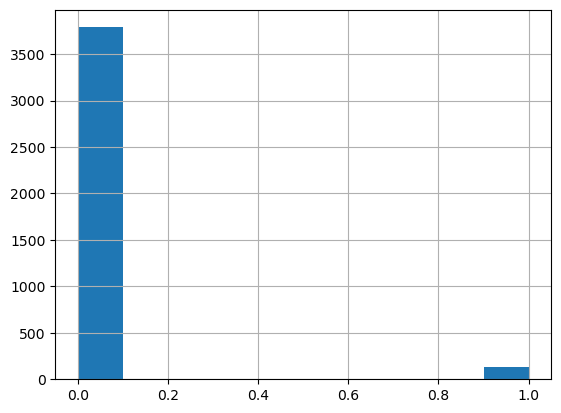

In [119]:
df_pred_cnn['y_pred'].hist()

In [121]:
df_pred_gpd_cnn = gpd.GeoDataFrame(df_pred_cnn, geometry=gpd.points_from_xy(df_pred_cnn.X, df_pred_cnn.Y), crs="EPSG:32643")

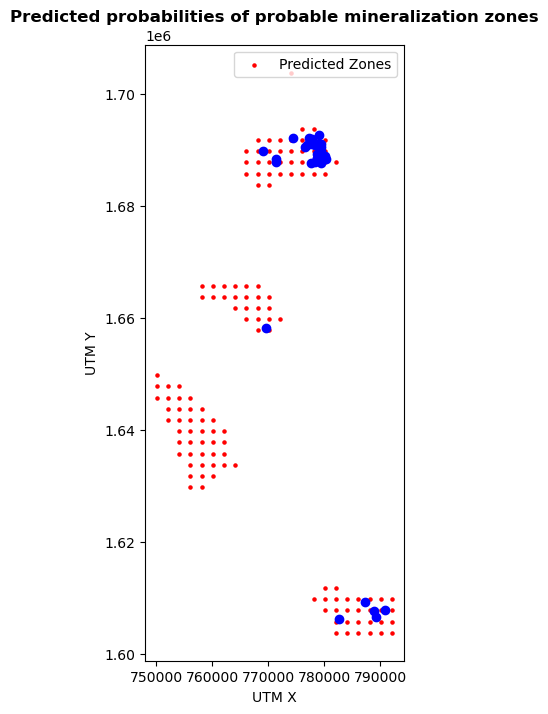

In [157]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))


df_pred_gpd_cnn[df_pred_gpd_cnn['y_pred'] == 1].plot(
    ax=ax, color='red', label="Predicted Zones", markersize=5
)
clipped_df_min_deposit.plot(ax=ax, color='blue')




# Labels and title
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')


plt.legend(["Predicted Zones"], loc='upper right')

plt.show()


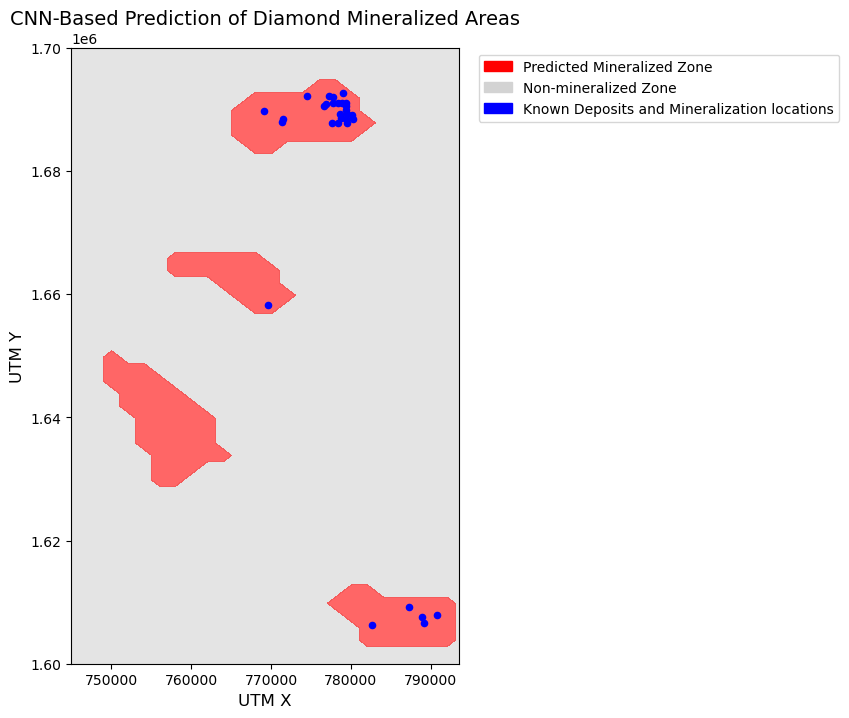

In [207]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_gpd_cnn['X'].values
Y_coords = df_pred_gpd_cnn['Y'].values
Z = df_pred_gpd_cnn['y_pred'].values
deposit_x = clipped_df_min_deposit['X'].values
deposit_y = clipped_df_min_deposit['Y'].values


xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coords)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
#mineral_x = np.array(mineral_x)
#mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
#mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
#mineral_x_clipped = mineral_x[mineral_mask]
#mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(5, 8))


contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
#plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("CNN-Based Prediction of Diamond Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits and Mineralization locations')
#black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot], loc='upper right', bbox_to_anchor=(2, 1))
plt.xlim(745000, 793500)
plt.ylim(1600000, 1700000)
plt.savefig("CNN_prediction_kimb.jpg",bbox_inches='tight')
plt.show()

In [117]:
clipped_df_min_deposit_buffer = clipped_df_min_deposit.buffer(500)  # 500m radius


In [217]:
df_pred_gpd_cnn['label']=0
for buffer in clipped_df_min_deposit_buffer:
    df_pred_gpd_cnn.loc[df_pred_gpd_cnn.geometry.within(buffer), 'label'] = 1

In [219]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_gpd_cnn['label']
y_pred_binary = (df_pred_gpd_cnn['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.9670918367346939
Precision: 0.015267175572519083
Recall: 1.0
F1 Score: 0.03007518796992481
Confusion Matrix:
 [[3789  129]
 [   0    2]]


In [221]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.967075  0.983262  3918.000000
1              0.015267  1.000000  0.030075     2.000000
accuracy       0.967092  0.967092  0.967092     0.967092
macro avg      0.507634  0.983538  0.506669  3920.000000
weighted avg   0.999498  0.967092  0.982776  3920.000000


In [239]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

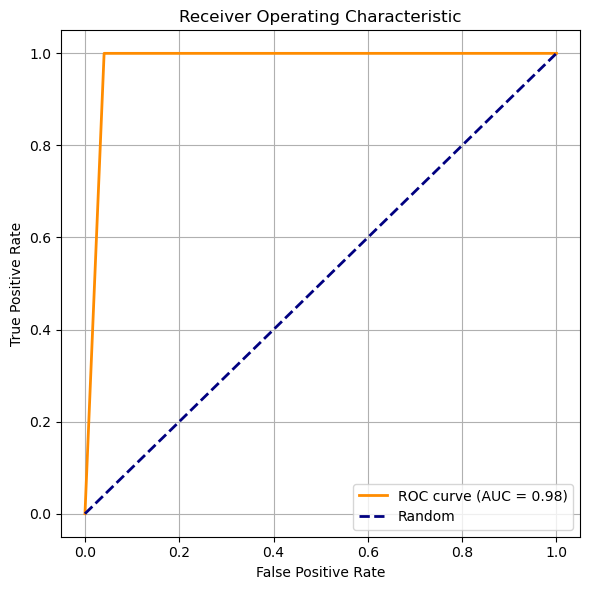

In [241]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_cnn.jpg")
plt.show()

In [191]:
df_pred_gpd_cnn.to_csv("kimb_pred.csv")

In [193]:
df_pred_gpd_cnn.to_file("kimb_pred.shp")

In [283]:
df_pred_gpd_cnn[df_pred_gpd_cnn['y_pred']==1].to_file("cnn_pred_kimb_1.shp")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(


In [255]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [203]:
BANDS = 13
input_shape = (IMG_SIZE, IMG_SIZE, BANDS)

In [ ]:
####### Ensemble Learning #####

In [249]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, AveragePooling2D,
                                     Flatten, Dense, Dropout, BatchNormalization,
                                     Add, Activation, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input, Conv2D, Dense, Lambda, GlobalAveragePooling1D


input_shape = (50,50,13)

# 1. Custom CNN (Baseline)
def build_model_a():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# 2. Deeper CNN with Dropout

def build_model_b():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# 3. LeNet-style CNN
def build_model_c():
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', input_shape=input_shape),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 4. ResNet-like CNN

def residual_block(x, filters):
    shortcut = x

    # Match shortcut shape if needed
    if x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same')(shortcut)

    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


def build_model_d():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = residual_block(x, 32)
    x = MaxPooling2D((2, 2))(x)
    x = residual_block(x, 64)
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

# 5. CNN with Attention Block (Tiny ViT-inspired)

def build_model_e():
    inputs = Input(shape=(50, 50, 13))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Flatten spatial dimensions (H, W) into sequence
    def reshape_to_sequence(tensor):
        shape = tf.shape(tensor)
        return tf.reshape(tensor, (shape[0], -1, shape[-1]))  # (batch_size, seq_len, channels)

    x_seq = Lambda(reshape_to_sequence)(x)

    # Compute attention
    query = Dense(64)(x_seq)
    key = Dense(64)(x_seq)
    value = Dense(64)(x_seq)

    def scaled_dot_product_attention(qkv):
        query, key, value = qkv
        scores = tf.matmul(query, key, transpose_b=True)
        scores = tf.nn.softmax(scores, axis=-1)
        return tf.matmul(scores, value)

    attention = Lambda(scaled_dot_product_attention)([query, key, value])

    x = GlobalAveragePooling1D()(attention)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs, outputs)

# Compile models
def compile_model(model):
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Ensemble prediction (soft voting)
def ensemble_predict(models, X):
    preds = [model.predict(X) for model in models]
    avg_pred = np.mean(preds, axis=0)
    return (avg_pred > 0.5).astype(int)



In [353]:
print("X_mod shape:", X_mod.shape)
print("Y shape:", Y.shape)


X_mod shape: (127, 50, 50, 13)
Y shape: (127,)


In [253]:
model_a = compile_model(build_model_a())
model_b = compile_model(build_model_b())
model_c = compile_model(build_model_c())
model_d = compile_model(build_model_d())
model_e = compile_model(build_model_e())

model_a.fit(X_mod, Y, epochs=10, batch_size=32)
model_b.fit(X_mod, Y, epochs=10, batch_size=32)
model_c.fit(X_mod, Y, epochs=10, batch_size=32)
model_d.fit(X_mod, Y, epochs=10, batch_size=32)
model_e.fit(X_mod, Y, epochs=10, batch_size=32)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9204 - loss: 0.1993
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9550 - loss: 0.1093
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9543 - loss: 0.1085
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9562 - loss: 0.1035
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9538 - loss: 0.1177
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9501 - loss: 0.1145
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9554 - loss: 0.1064
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9547 - loss: 0.1066
Epoch 9/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9563 - loss: 0.1053
Epoch 10/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9564 - loss: 0.1034
Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.9082 - loss: 0.2221
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 

In [255]:

models = [model_a, model_b, model_c, model_d, model_e]

y_pred = ensemble_predict(models, X_test_mod)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 361ms/step


In [257]:
UTMX = center_coords[:,0]
UTMY = center_coords[:,1]

In [259]:
df_pred_ensemble = pd.DataFrame(np.column_stack([UTMX, UTMY , y_pred]), columns=['X','Y','y_pred'])

<Axes: >

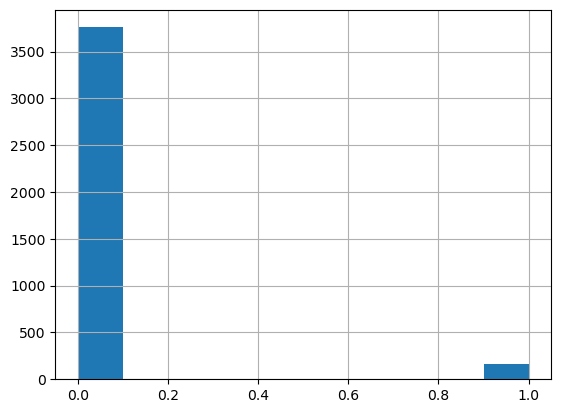

In [261]:
df_pred_ensemble['y_pred'].hist()

In [263]:
df_pred_ensemble_gpd = gpd.GeoDataFrame(df_pred_ensemble, geometry=gpd.points_from_xy(df_pred_ensemble.X, df_pred_ensemble.Y), crs="EPSG:32643")

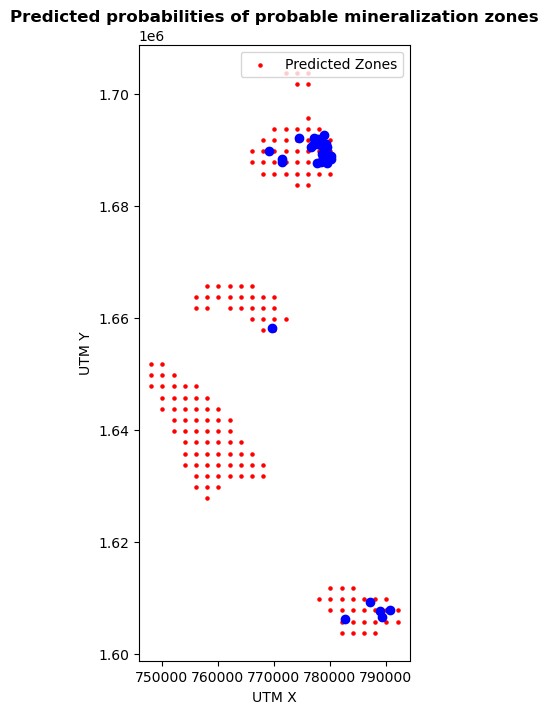

In [199]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

df_pred_ensemble_gpd[df_pred_ensemble_gpd['y_pred'] == 1].plot(
    ax=ax, color='red', label="Predicted Zones", markersize=5
)
clipped_df_min_deposit.plot(ax=ax, color='blue')



plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')

plt.legend(["Predicted Zones"], loc='upper right')

plt.show()


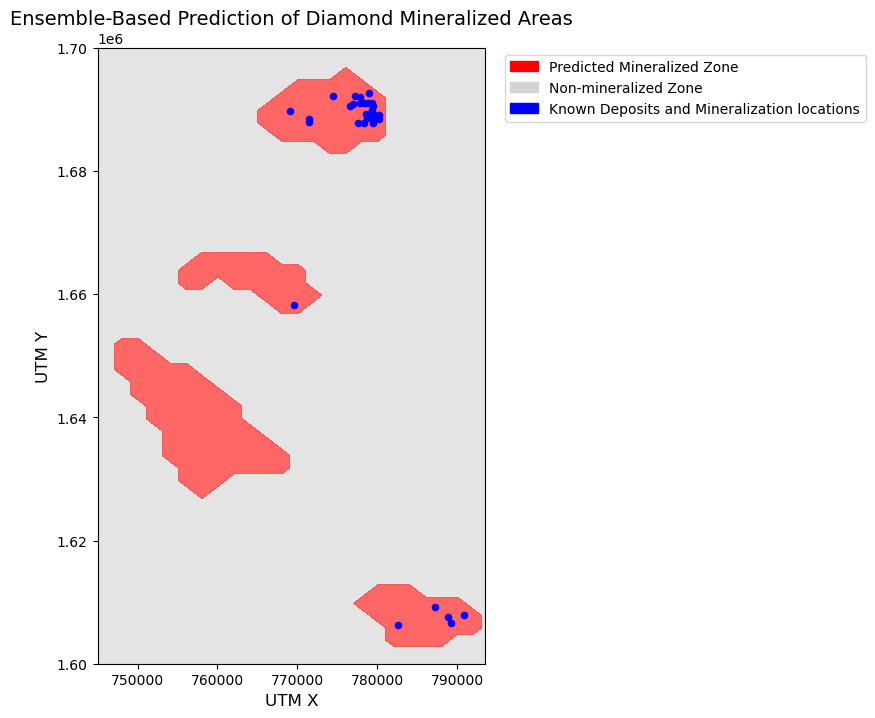

In [201]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_ensemble_gpd['X'].values
Y_coords = df_pred_ensemble_gpd['Y'].values
Z = df_pred_ensemble_gpd['y_pred'].values
deposit_x = clipped_df_min_deposit['X'].values
deposit_y = clipped_df_min_deposit['Y'].values


xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coords)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
#mineral_x = np.array(mineral_x)
#mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
#mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
#mineral_x_clipped = mineral_x[mineral_mask]
#mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(5, 8))

contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
#plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("Ensemble-Based Prediction of Diamond Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits and Mineralization locations')
#black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot], loc='upper right', bbox_to_anchor=(2, 1))
plt.xlim(745000, 793500)
plt.ylim(1600000, 1700000)
#plt.tight_layout()
plt.savefig("ensemble_prediction_kimb.jpg", bbox_inches='tight')
plt.show()

In [227]:
df_pred_ensemble_gpd['label']=0
for buffer in clipped_df_min_deposit_buffer:
    df_pred_ensemble_gpd.loc[df_pred_ensemble_gpd.geometry.within(buffer), 'label'] = 1

In [229]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_ensemble_gpd['label']
y_pred_binary = (df_pred_ensemble_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.9594387755102041
Precision: 0.012422360248447204
Recall: 1.0
F1 Score: 0.024539877300613498
Confusion Matrix:
 [[3759  159]
 [   0    2]]


In [231]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.959418  0.979289  3918.000000
1              0.012422  1.000000  0.024540     2.000000
accuracy       0.959439  0.959439  0.959439     0.959439
macro avg      0.506211  0.979709  0.501914  3920.000000
weighted avg   0.999496  0.959439  0.978802  3920.000000


In [233]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

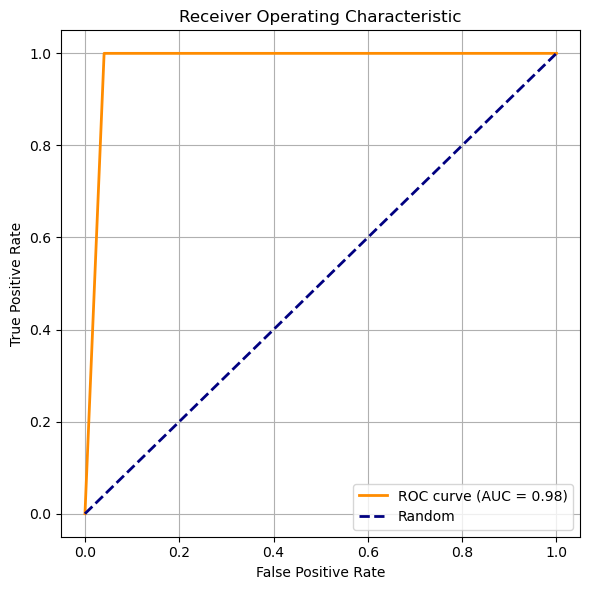

In [237]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_ensemble.jpg")
plt.show()

In [193]:
df_pred_ensemble_gpd.to_csv("kimb_ensemble_pred.csv")

NameError: name 'df_pred_ensemble_gpd' is not defined

In [271]:
df_pred_ensemble_gpd.to_file("kimb_ensemble_pred.shp")

In [281]:
df_pred_ensemble_gpd[df_pred_ensemble_gpd['y_pred']==1].to_file("ensemble_pred_kimb_1.shp")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(


In [281]:
X_mod.shape

(12827, 50, 50, 13)

In [283]:
!pip install torch

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 5.5 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [285]:
!pip install torch_geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.8 MB/s eta 0:00:00a 0:00:01


In [69]:
X_mod.shape

(11110, 50, 50, 24)

In [355]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader  
from sklearn.neighbors import NearestNeighbors


num_samples, H, W, C = X_mod.shape  
X = X_mod  
Y = torch.tensor(Y, dtype=torch.long)
X_flattened = X.reshape((num_samples, H * W * C))
X_gcnn = torch.tensor(X_flattened, dtype=torch.float)  

k = 5  
nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(X_flattened)  
distances, indices = nbrs.kneighbors(X_flattened)


def grid_edges(H, W):
    edges = []
    for i in range(H):
        for j in range(W):
            idx = i * W + j
            if i + 1 < H:
                edges.append([idx, (i + 1) * W + j])
            if j + 1 < W:
                edges.append([idx, i * W + (j + 1)])

    return torch.tensor(edges, dtype=torch.long).t().contiguous()

def cnn_to_graph(cnn_sample, sample_idx):
    node_features = cnn_sample.reshape(-1, C)  

    
    x_coords = torch.arange(W).repeat(H, 1).flatten().unsqueeze(1)
    y_coords = torch.arange(H).repeat_interleave(W).unsqueeze(1)
    spatial_coords = torch.cat([x_coords, y_coords], dim=1).float() / W  # normalize to [0,1]
    node_features = torch.cat([node_features, spatial_coords], dim=1)

    
    edge_index = grid_edges(H, W)

    return Data(
        x=torch.tensor(node_features, dtype=torch.float),
        edge_index=edge_index,
        y=torch.tensor([Y[sample_idx]], dtype=torch.long)
    )
    


graph_list = [cnn_to_graph(X_gcnn[i],i) for i in range(num_samples)]
batch_size = 10
loader = DataLoader(graph_list, batch_size=batch_size, shuffle=True)

############################################
# Define the GNN Model
############################################
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = SAGEConv(15, 64)
        self.conv2 = SAGEConv(64, 64)
        self.lin = torch.nn.Linear(64, 2)  # Binary classification

    def forward(self, data):
        
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)  # Graph-level pooling
        return self.lin(x)


model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

############################################
# Training Loop
############################################
for epoch in range(300):
    model.train()
    total_loss = 0
    for batch_data in loader:
        optimizer.zero_grad()
        out = model(batch_data)  # Output shape: [batch_size, 2]
        loss = loss_fn(out, batch_data.y.squeeze())  # .squeeze() for shape (batch_size,)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


/var/folders/cj/c3lxhrz916l_n171dhdhbg8h0000gp/T/ipykernel_29472/1191529976.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(node_features, dtype=torch.float),


Epoch 0, Loss: 8.0944
Epoch 1, Loss: 6.4211
Epoch 2, Loss: 5.4288
Epoch 3, Loss: 4.2743
Epoch 4, Loss: 3.1881
Epoch 5, Loss: 2.5539
Epoch 6, Loss: 2.5527
Epoch 7, Loss: 2.2376
Epoch 8, Loss: 1.7582
Epoch 9, Loss: 1.5422
Epoch 10, Loss: 1.4153
Epoch 11, Loss: 1.4554
Epoch 12, Loss: 1.3483
Epoch 13, Loss: 1.3011
Epoch 14, Loss: 1.1362
Epoch 15, Loss: 1.0940
Epoch 16, Loss: 1.0052
Epoch 17, Loss: 1.0908
Epoch 18, Loss: 1.0344
Epoch 19, Loss: 1.1656
Epoch 20, Loss: 1.1254
Epoch 21, Loss: 0.8397
Epoch 22, Loss: 0.7745
Epoch 23, Loss: 0.8602
Epoch 24, Loss: 0.6735
Epoch 25, Loss: 0.7531
Epoch 26, Loss: 0.6094
Epoch 27, Loss: 0.6751
Epoch 28, Loss: 0.9092
Epoch 29, Loss: 0.9260
Epoch 30, Loss: 0.5935
Epoch 31, Loss: 0.5587
Epoch 32, Loss: 0.4729
Epoch 33, Loss: 0.4607
Epoch 34, Loss: 0.4083
Epoch 35, Loss: 0.4019
Epoch 36, Loss: 0.3844
Epoch 37, Loss: 0.3780
Epoch 38, Loss: 0.3929
Epoch 39, Loss: 0.4166
Epoch 40, Loss: 0.3254
Epoch 41, Loss: 0.3215
Epoch 42, Loss: 0.2817
Epoch 43, Loss: 0.285

In [335]:
"""
def cnn_test_to_graph(cnn_sample):
    node_features = cnn_sample.reshape(-1, C)  # (2500, 7)

    # Build edges (same as train)
    edge_list = []
    for i in range(H):
        for j in range(W):
            node_id = i * W + j
            if i + 1 < H:
                edge_list.append([node_id, (i + 1) * W + j])
            if j + 1 < W:
                edge_list.append([node_id, i * W + (j + 1)])
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

    return Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index)
"""

In [357]:
def cnn_test_to_graph(cnn_sample):
    cnn_sample = torch.tensor(cnn_sample, dtype=torch.float)  
    node_features = cnn_sample.reshape(-1, C)  

    x_coords = torch.arange(W).repeat(H, 1).flatten().unsqueeze(1)
    y_coords = torch.arange(H).repeat_interleave(W).unsqueeze(1)
    spatial_coords = torch.cat([x_coords, y_coords], dim=1).float() / W  
    node_features = torch.cat([node_features, spatial_coords], dim=1)  

    edge_list = []
    for i in range(H):
        for j in range(W):
            node_id = i * W + j
            if i + 1 < H:
                edge_list.append([node_id, (i + 1) * W + j])
            if j + 1 < W:
                edge_list.append([node_id, i * W + (j + 1)])
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

    return Data(x=node_features, edge_index=edge_index)


In [359]:
test_graph_list = [cnn_test_to_graph(X_test_mod[i]) for i in range(X_test_mod.shape[0])]
test_loader = DataLoader(test_graph_list, batch_size=16, shuffle=False)

In [361]:
model.eval()
all_preds = []
all_probs = []

with torch.no_grad():
    for batch_data in test_loader:
        out = model(batch_data)               
        preds = torch.argmax(out, dim=1)      
        probs = F.softmax(out, dim=1)            
        all_probs.append(probs)
        all_preds.append(preds)


final_probs = torch.cat(all_probs, dim=0)
        

# Concatenate all predictions
final_preds = torch.cat(all_preds, dim=0)
print("Predicted Y for X_test:", final_preds)
print("Probability Y for X_test:", final_probs)

Predicted Y for X_test: tensor([0, 1, 0,  ..., 0, 0, 0])
Probability Y for X_test: tensor([[1.0000e+00, 4.3751e-23],
        [1.7967e-02, 9.8203e-01],
        [1.0000e+00, 1.8448e-07],
        ...,
        [1.0000e+00, 1.5376e-16],
        [1.0000e+00, 2.5633e-20],
        [9.9588e-01, 4.1241e-03]])


(array([3687.,   21.,    9.,    9.,    4.,    7.,   18.,   10.,   13.,
         142.]),
 array([0.        , 0.09999994, 0.19999988, 0.29999983, 0.39999977,
        0.4999997 , 0.59999967, 0.69999957, 0.79999954, 0.89999944,
        0.9999994 ]),
 <BarContainer object of 10 artists>)

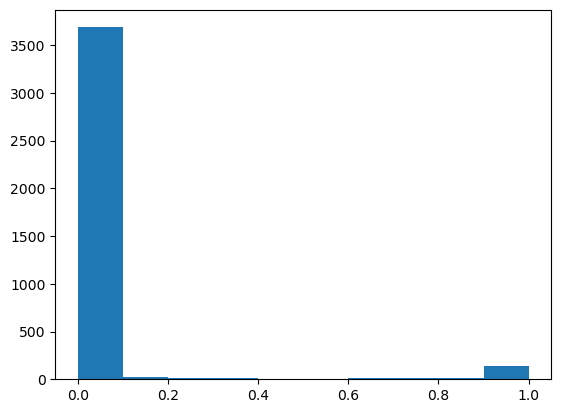

In [363]:
import matplotlib.pyplot as plt
plt.hist(final_probs[:,1])

(array([3730.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         190.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

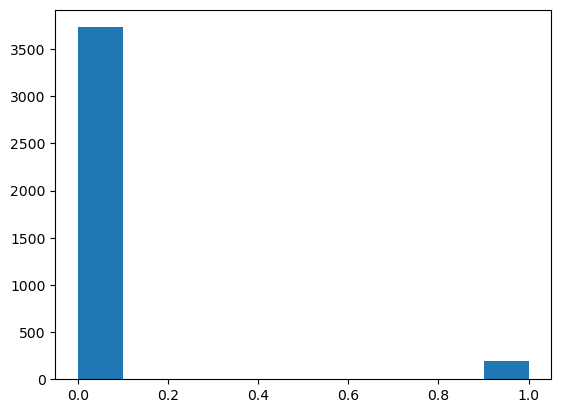

In [365]:
import matplotlib.pyplot as plt
plt.hist(final_preds)

In [367]:
UTMX_gcnn = center_coords[:,0]
UTMY_gcnn = center_coords[:,1]

In [369]:
df_pred_gcnn = pd.DataFrame(np.column_stack([UTMX_gcnn, UTMY_gcnn ,final_preds]), columns=['X','Y','y_pred'])

In [371]:
df_prob_gcnn = pd.DataFrame(np.column_stack([UTMX_gcnn, UTMY_gcnn ,final_probs[:,1]]), columns=['X','Y','y_prob'])

In [377]:
import geopandas as gpd
df_pred_gpd_gcnn= gpd.GeoDataFrame(df_pred_gcnn, geometry=gpd.points_from_xy(df_pred_gcnn.X, df_pred_gcnn.Y), crs="EPSG:32643")

In [375]:
df_prob_gpd_gcnn = gpd.GeoDataFrame(df_prob_gcnn, geometry=gpd.points_from_xy(df_prob_gcnn.X, df_prob_gcnn.Y), crs="EPSG:32643")

In [391]:
df_pred_gpd_gcnn.to_file("gcnn_pred_kimb.shp")

In [279]:
df_pred_gpd_gcnn[df_pred_gpd_gcnn['y_pred']==1].to_file("gcnn_pred_kimb_1.shp")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(


In [389]:
df_pred_gpd_gcnn.to_csv("gcnn_pred_kimb.csv")

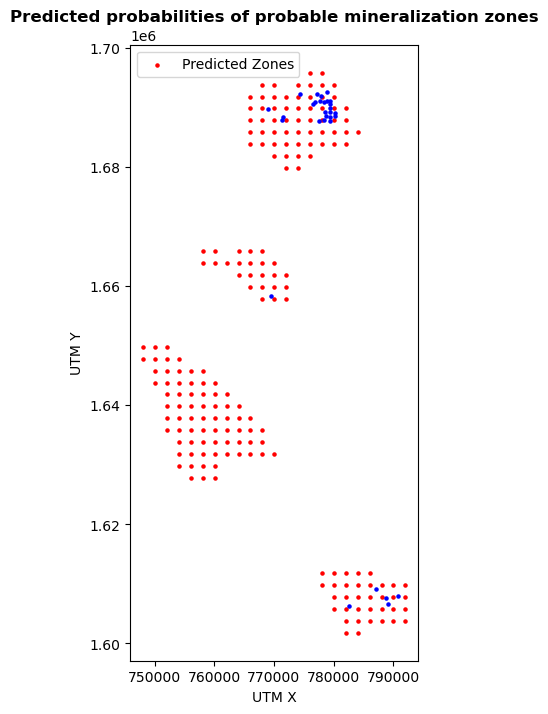

In [383]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
df_pred_gpd_gcnn[df_pred_gpd_gcnn['y_pred'] == 1.0].plot(ax=ax, color='red', label="Predicted Zones", markersize=5)
clipped_df_min_deposit.plot(ax=ax, color='blue', markersize=5)
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
plt.legend()
plt.show()

In [83]:
y_predict = model.predict(X_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step


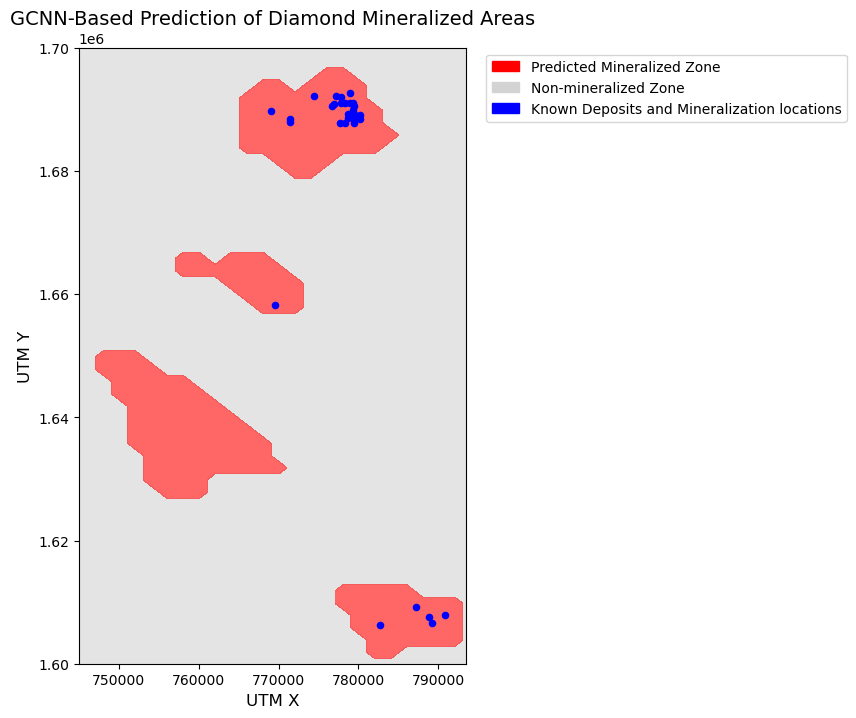

In [215]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_gpd_gcnn['X'].values
Y_coords = df_pred_gpd_gcnn['Y'].values
Z = df_pred_gpd_gcnn['y_pred'].values
deposit_x = clipped_df_min_deposit['X'].values
deposit_y = clipped_df_min_deposit['Y'].values


xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coords)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
#mineral_x = np.array(mineral_x)
#mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
#mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
#mineral_x_clipped = mineral_x[mineral_mask]
#mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(5, 8))

contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
#plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("GCNN-Based Prediction of Diamond Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits and Mineralization locations')
#black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot], loc='upper right', bbox_to_anchor=(2, 1))
plt.xlim(745000, 793500)
plt.ylim(1600000, 1700000)
#plt.tight_layout()
plt.savefig("gcnn_prediction_kimb.jpg", bbox_inches='tight')
plt.show()

In [243]:
df_pred_gpd_gcnn['label']=0
for buffer in clipped_df_min_deposit_buffer:
    df_pred_gpd_gcnn.loc[df_pred_gpd_gcnn.geometry.within(buffer), 'label'] = 1

In [245]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_gpd_gcnn['label']
y_pred_binary = (df_pred_gpd_gcnn['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.9520408163265306
Precision: 0.010526315789473684
Recall: 1.0
F1 Score: 0.020833333333333332
Confusion Matrix:
 [[3730  188]
 [   0    2]]


In [247]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.952016  0.975418  3918.000000
1              0.010526  1.000000  0.020833     2.000000
accuracy       0.952041  0.952041  0.952041     0.952041
macro avg      0.505263  0.976008  0.498126  3920.000000
weighted avg   0.999495  0.952041  0.974931  3920.000000


In [249]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

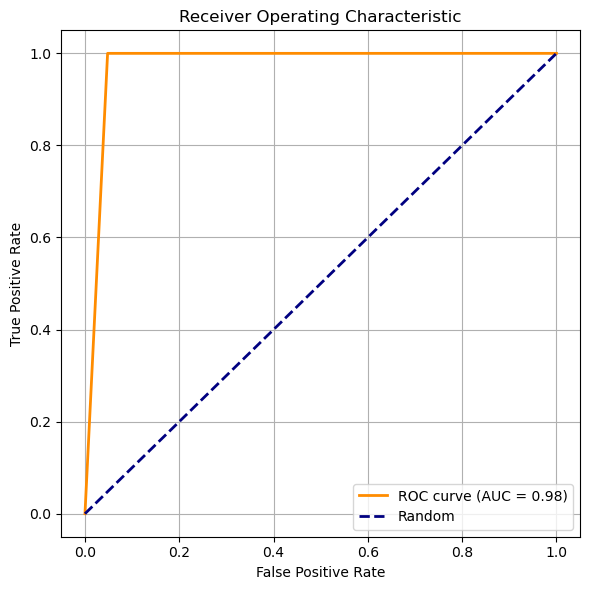

In [251]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_gcnn.jpg")
plt.show()

In [ ]:
############# Random Forest and XGBoost #########

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [121]:
rc = RandomForestClassifier(n_estimators=100, random_state=42)

In [123]:
X_rf = X_mod.mean(axis=(1, 2))  


In [125]:
X_rf.shape

(12827, 13)

In [127]:
Y.shape

(12827,)

In [129]:
rc.fit(X_rf,Y)

RandomForestClassifier(random_state=42)

In [131]:
X_test_rf = X_test_mod.mean(axis=(1, 2)) 

In [133]:
X_test_rf.shape

(3920, 13)

In [135]:
y_pred = rc.predict(X_test_rf)

In [137]:
y_pred.shape

(3920,)

In [139]:
UTMX = center_coords[:,0]
UTMY = center_coords[:,1]

In [141]:
df_pred_rf = pd.DataFrame(np.column_stack([UTMX, UTMY , y_pred]), columns=['X','Y','y_pred'])

In [143]:
df_pred_rf_gpd = gpd.GeoDataFrame(df_pred_rf, geometry=gpd.points_from_xy(df_pred_rf.X, df_pred_rf.Y), crs="EPSG:32643")

In [253]:
df_pred_rf_gpd.to_file("rf_pred_kimb.shp")

In [277]:
df_pred_rf_gpd[df_pred_rf_gpd['y_pred']==1].to_file("rf_pred_kimb_1.shp")

In [255]:
df_pred_rf_gpd.to_csv("rf_pred_kimb.csv")

<Axes: >

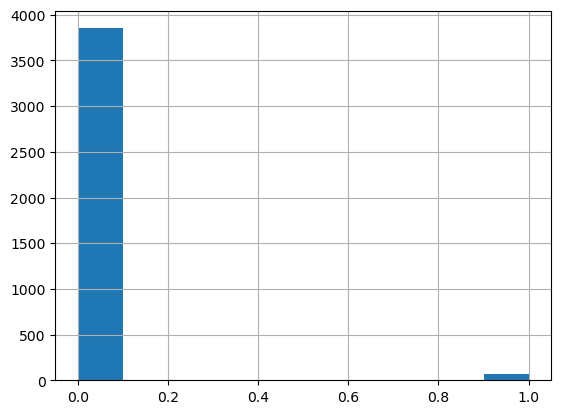

In [145]:
df_pred_rf_gpd['y_pred'].hist()

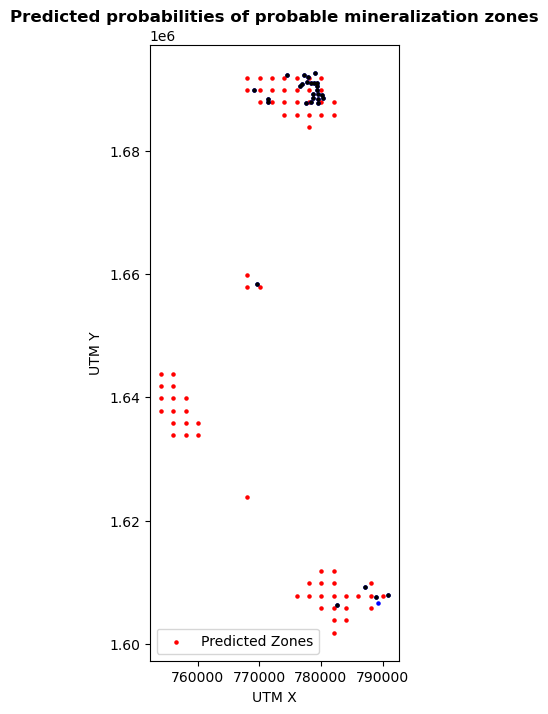

In [147]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
df_pred_rf_gpd[df_pred_rf_gpd['y_pred'] == 1].plot(ax=ax, color='red', label="Predicted Zones", markersize=5)
clipped_df_min_deposit.plot(ax=ax, color='blue', markersize=5)
df_min.plot(ax=ax, color='black', markersize=5)
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
plt.legend()
plt.show()

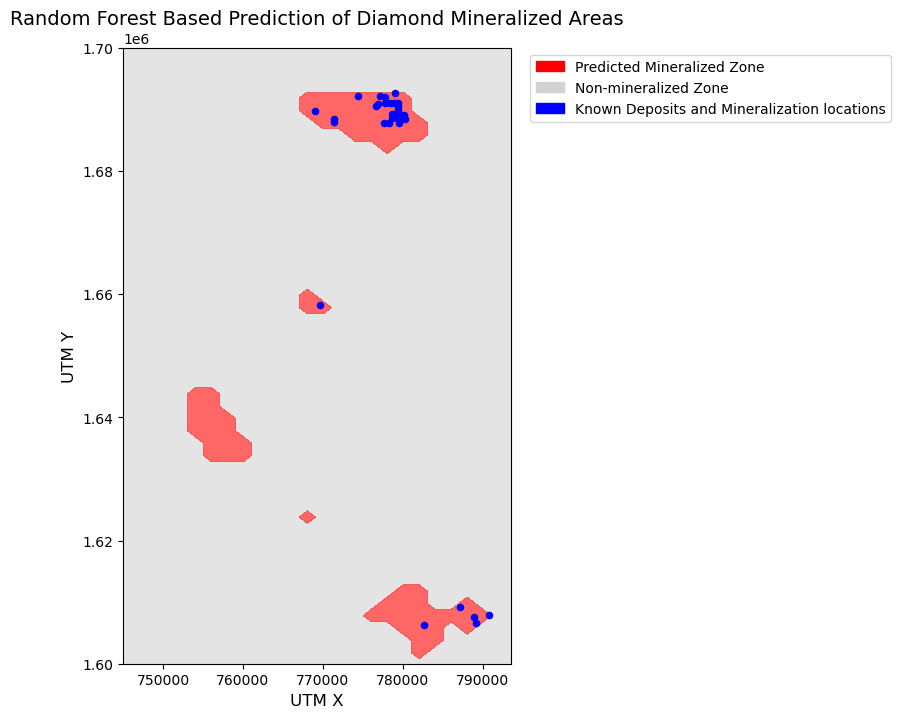

In [217]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coord = df_pred_rf_gpd['X'].values
Y_coord = df_pred_rf_gpd['Y'].values
Z = df_pred_rf_gpd['y_pred'].values
deposit_x = clipped_df_min_deposit['X'].values
deposit_y = clipped_df_min_deposit['Y'].values


xi = np.unique(X_coord)
yi = np.unique(Y_coord)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coord)):
    x_idx = np.where(xi == X_coord[i])[0][0]
    y_idx = np.where(yi == Y_coord[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
#mineral_x = np.array(mineral_x)
#mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
#mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
#mineral_x_clipped = mineral_x[mineral_mask]
#mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(5, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
#plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("Random Forest Based Prediction of Diamond Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits and Mineralization locations')
#black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot], loc='upper right', bbox_to_anchor=(2, 1))
plt.xlim(745000, 793500)
plt.ylim(1600000, 1700000)
#plt.tight_layout()
plt.savefig("rf_prediction_kimb.jpg", bbox_inches='tight')
plt.show()

In [157]:
!pip install xgboost

In [151]:
from xgboost import XGBClassifier

In [153]:
xgb = XGBClassifier()

In [155]:
xgb.fit(X_rf,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [157]:
y_pred_xgb = xgb.predict(X_test_rf)

(array([3761.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

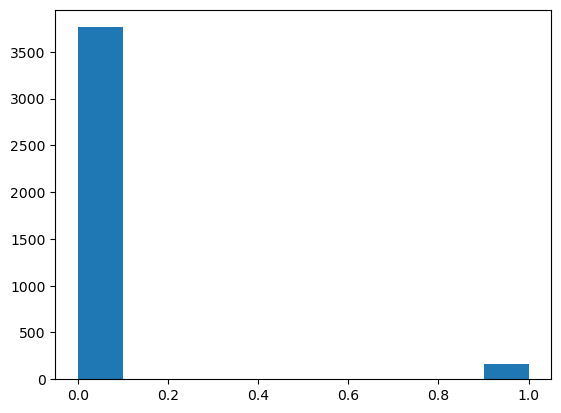

In [159]:
plt.hist(y_pred_xgb)

In [161]:
df_pred_xgb = pd.DataFrame(np.column_stack([UTMX, UTMY , y_pred_xgb]), columns=['X','Y','y_pred'])

In [163]:
df_pred_xgb_gpd = gpd.GeoDataFrame(df_pred_xgb, geometry=gpd.points_from_xy(df_pred_xgb.X, df_pred_xgb.Y), crs="EPSG:32643")

In [257]:
df_pred_xgb_gpd.to_file("xgb_pred_kimb.shp")

In [275]:
df_pred_xgb_gpd[df_pred_xgb_gpd['y_pred']==1].to_file("xgb_pred_kimb_1.shp")

In [259]:
df_pred_xgb_gpd.to_csv("xgb_pred_kimb.csv")

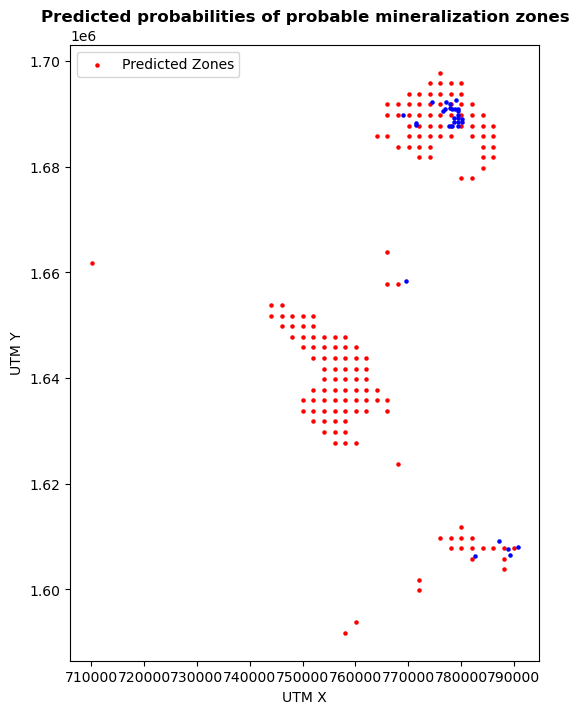

In [173]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
#df_mod_gdf.plot(column='Band_13', ax=ax, cmap ='viridis')
df_pred_xgb_gpd[df_pred_xgb_gpd['y_pred'] == 1].plot(ax=ax, color='red', label="Predicted Zones", markersize=5)
clipped_df_min_deposit.plot(ax=ax, color='blue', markersize=5)
#df_min.plot(ax=ax, color='black', markersize=5)
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
#ax.set_xlim(607500, 796350)
#ax.set_ylim(1524000, 1742700)
plt.legend()
plt.show()

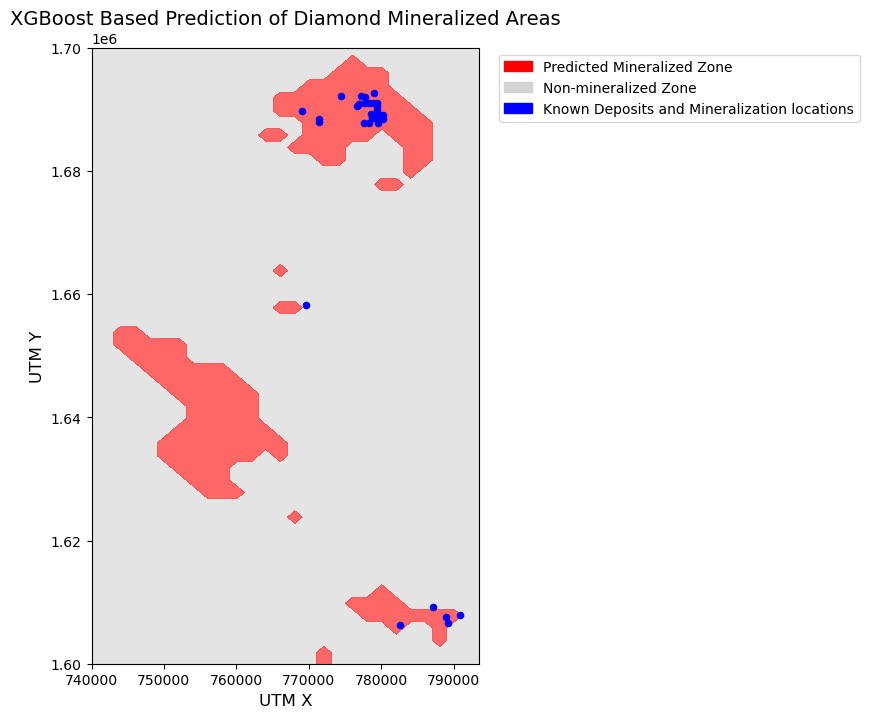

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coord = df_pred_xgb_gpd['X'].values
Y_coord = df_pred_xgb_gpd['Y'].values
Z = df_pred_xgb_gpd['y_pred'].values
deposit_x = clipped_df_min_deposit['X'].values
deposit_y = clipped_df_min_deposit['Y'].values


xi = np.unique(X_coord)
yi = np.unique(Y_coord)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coord)):
    x_idx = np.where(xi == X_coord[i])[0][0]
    y_idx = np.where(yi == Y_coord[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
#mineral_x = np.array(mineral_x)
#mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
#mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
#mineral_x_clipped = mineral_x[mineral_mask]
#mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(5, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
#plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("XGBoost Based Prediction of Diamond Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits and Mineralization locations')
plt.legend(handles=[red_patch, grey_patch, blue_dot], loc='upper right', bbox_to_anchor=(2, 1))
plt.xlim(740000, 793500)
plt.ylim(1600000, 1700000)
#plt.tight_layout()
plt.savefig("xgb_prediction_kimb.jpg", bbox_inches='tight')
plt.show()

In [181]:
df_pred_rf_gpd['label']=0
for buffer in clipped_df_min_deposit_buffer:
    df_pred_rf_gpd.loc[df_pred_rf_gpd.geometry.within(buffer), 'label'] = 1

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_rf_gpd['label']
y_pred_binary = (df_pred_rf_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.9831632653061224
Precision: 0.029411764705882353
Recall: 1.0
F1 Score: 0.05714285714285714
Confusion Matrix:
 [[3852   66]
 [   0    2]]


In [185]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)

In [187]:
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.983155  0.991506  3918.000000
1              0.029412  1.000000  0.057143     2.000000
accuracy       0.983163  0.983163  0.983163     0.983163
macro avg      0.514706  0.991577  0.524324  3920.000000
weighted avg   0.999505  0.983163  0.991029  3920.000000


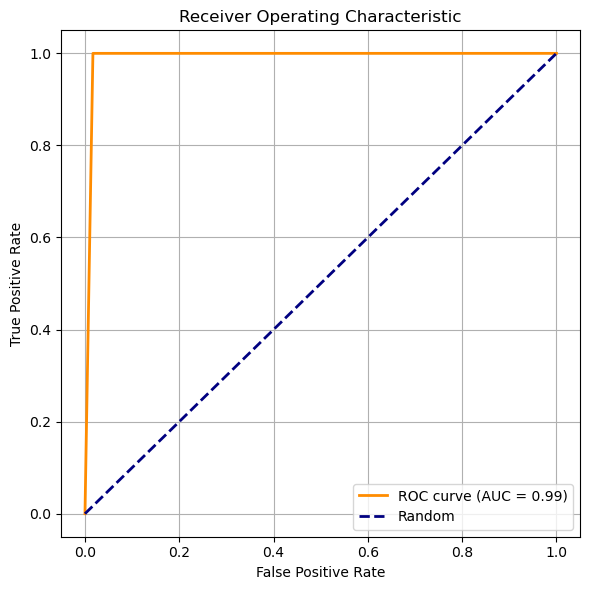

In [189]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_rf.jpg")
plt.show()

In [171]:
df_pred_xgb_gpd['label']=0
for buffer in clipped_df_min_deposit_buffer:
    df_pred_xgb_gpd.loc[df_pred_xgb_gpd.geometry.within(buffer), 'label'] = 1


In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_xgb_gpd['label']
y_pred_binary = (df_pred_xgb_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.9599489795918368
Precision: 0.012578616352201259
Recall: 1.0
F1 Score: 0.024844720496894408
Confusion Matrix:
 [[3761  157]
 [   0    2]]


In [175]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)

In [177]:
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.959929  0.979555  3918.000000
1              0.012579  1.000000  0.024845     2.000000
accuracy       0.959949  0.959949  0.959949     0.959949
macro avg      0.506289  0.979964  0.502200  3920.000000
weighted avg   0.999496  0.959949  0.979068  3920.000000


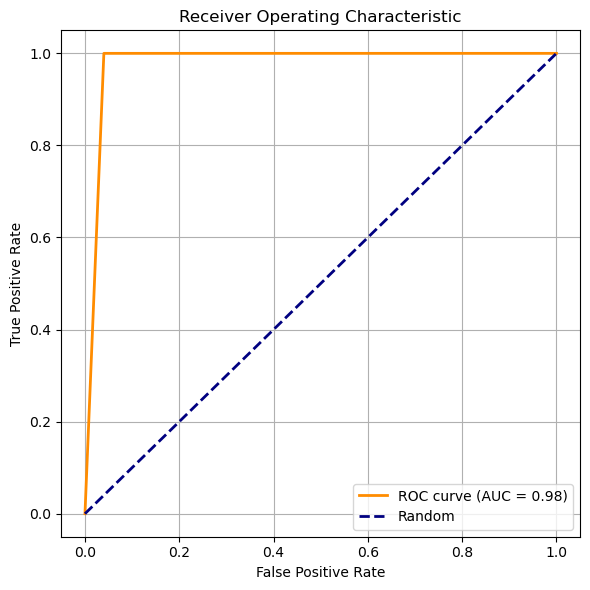

In [179]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_xgb.jpg")
plt.show()

In [261]:
gdf1 = gpd.read_file("kimb_pred.shp")
gdf2 = gpd.read_file("kimb_ensemble_pred.shp")
gdf3 = gpd.read_file("gcnn_pred_kimb.shp")
gdf4 = gpd.read_file("rf_pred_kimb.shp")
gdf5 = gpd.read_file("xgb_pred_kimb.shp")


In [263]:
target_crs = gdf1.crs
gdf2 = gdf2.to_crs(target_crs)
gdf3 = gdf3.to_crs(target_crs)
gdf4 = gdf4.to_crs(target_crs)
gdf5 = gdf5.to_crs(target_crs)


In [265]:
gdf1 = gdf1[gdf1['y_pred']==1][['geometry']]
gdf2 = gdf2[gdf2['y_pred']==1][['geometry']]
gdf3 = gdf3[gdf3['y_pred']==1][['geometry']]
gdf4 = gdf4[gdf4['y_pred']==1][['geometry']]
gdf5 = gdf5[gdf5['y_pred']==1][['geometry']]

In [269]:
common_area = gdf1.overlay(gdf2, how='intersection')
common_area = common_area.overlay(gdf3, how='intersection')
common_area = common_area.overlay(gdf4, how='intersection')
common_area = common_area.overlay(gdf5, how='intersection')



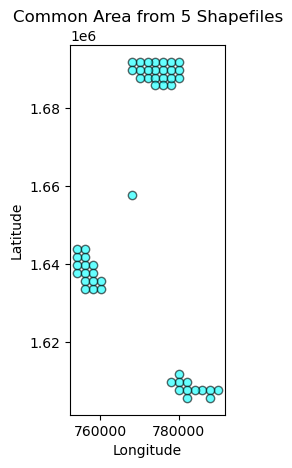

In [271]:
common_area.plot(edgecolor='black', facecolor='cyan', alpha=0.6)
plt.title("Common Area from 5 Shapefiles")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [273]:
common_area.to_file("kimb_common_area.shp")